# Table of Contents

## Substance

- [Chromium Data](#Chromium-Data)
- [Benzene Data](#Benzene-Data)
- [Toluene Data](#Toluene-Data)
- [Cadmium Data](#Cadmium-Data)
- [Combo Plots](#Combo-Plots)

In [4]:
#Importing dependencies
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import gmaps
from config  import gkey
gmaps.configure(api_key=gkey)

<a id='Chromium-Data'></a>

# Chromium Data

In [109]:
#importing chromium csv
chromium_csv = "Database/Chromium/Chromium.csv"
chromium = pd.read_csv(chromium_csv)
chromium.head()

,STATE_ABBR,AMA_SITE_CODE,AQS_POC,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,AQS_PARAMETER_CODE,AQS_PARAMETER_NAME,...,AQS_QUALIFIER_10,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,SAMPLE_VALUE_FLAG,BELOW_MDL_FLAG,CENSUS_TRACT_ID,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,NJ,340010006,1,IMPROVE,2014,4,14-Oct-14,00:00,88112,Chromium (PM2.5),...,NaN,800,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,X-Ray Fluorescence,NaN,NaN,34001010505,3044,39.464872,-74.448736
1,NJ,340010006,1,IMPROVE,2014,4,25-Nov-14,00:00,88112,Chromium (PM2.5),...,NaN,800,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,X-Ray Fluorescence,NaN,NaN,34001010505,3044,39.464872,-74.448736
2,NJ,340010006,1,IMPROVE,2014,3,02-Sep-14,00:00,88112,Chromium (PM2.5),...,NaN,800,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,X-Ray Fluorescence,NaN,NaN,34001010505,3044,39.464872,-74.448736
3,NJ,340010006,1,IMPROVE,2014,3,05-Sep-14,00:00,88112,Chromium (PM2.5),...,NaN,800,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,X-Ray Fluorescence,NaN,NaN,34001010505,3044,39.464872,-74.448736
4,NJ,340010006,1,IMPROVE,2014,3,08-Sep-14,00:00,88112,Chromium (PM2.5),...,NaN,800,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,X-Ray Fluorescence,NaN,NaN,34001010505,3044,39.464872,-74.448736


In [110]:
#selecting which columns to keep in the dataframe
chromium = chromium[['PROGRAM', 'YEAR', 'QUARTER', 'SAMPLE_DATE', 'SAMPLE_START_TIME', 'DURATION_DESC', 
'SAMPLE_VALUE_REPORTED', 'UNIT_DESC', 'SAMPLE_VALUE_STD_FINAL_TYPE', 'MDL_STD_UG_M3','SAMPLE_VALUE_STD_FINAL_UG_M3', 'CENSUS_TRACT_POPULATION_2010', 'MONITOR_LATITUDE', 
'MONITOR_LONGITUDE']]
chromium.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,SAMPLE_VALUE_STD_FINAL_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,IMPROVE,2014,4,14-Oct-14,00:00,24 HOURS,0.0001,UG/CU METER (LC),L,0.0001,0.0001,3044,39.464872,-74.448736
1,IMPROVE,2014,4,25-Nov-14,00:00,24 HOURS,0.0002,UG/CU METER (LC),L,0.0001,0.0002,3044,39.464872,-74.448736
2,IMPROVE,2014,3,02-Sep-14,00:00,24 HOURS,0.0005,UG/CU METER (LC),L,0.0001,0.0005,3044,39.464872,-74.448736
3,IMPROVE,2014,3,05-Sep-14,00:00,24 HOURS,0.0003,UG/CU METER (LC),L,0.0001,0.0003,3044,39.464872,-74.448736
4,IMPROVE,2014,3,08-Sep-14,00:00,24 HOURS,0.0001,UG/CU METER (LC),L,0.0001,0.0001,3044,39.464872,-74.448736


In [111]:
#resaving as a pandas dataframe
chromium_df = pd.DataFrame(chromium)
chromium_df.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,SAMPLE_VALUE_STD_FINAL_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,IMPROVE,2014,4,14-Oct-14,00:00,24 HOURS,0.0001,UG/CU METER (LC),L,0.0001,0.0001,3044,39.464872,-74.448736
1,IMPROVE,2014,4,25-Nov-14,00:00,24 HOURS,0.0002,UG/CU METER (LC),L,0.0001,0.0002,3044,39.464872,-74.448736
2,IMPROVE,2014,3,02-Sep-14,00:00,24 HOURS,0.0005,UG/CU METER (LC),L,0.0001,0.0005,3044,39.464872,-74.448736
3,IMPROVE,2014,3,05-Sep-14,00:00,24 HOURS,0.0003,UG/CU METER (LC),L,0.0001,0.0003,3044,39.464872,-74.448736
4,IMPROVE,2014,3,08-Sep-14,00:00,24 HOURS,0.0001,UG/CU METER (LC),L,0.0001,0.0001,3044,39.464872,-74.448736


In [112]:
#checking value counts for each program in the dataset
program = chromium_df["PROGRAM"].value_counts()
program

PM2.5 SPECIATION NETWORK      6935
IMPROVE                       2921
CSN SUPPLEMENTAL               320
COMMUNITY-SCALE MONITORING     249
SLAMS                           40
Name: PROGRAM, dtype: int64

<IPython.core.display.Javascript object>


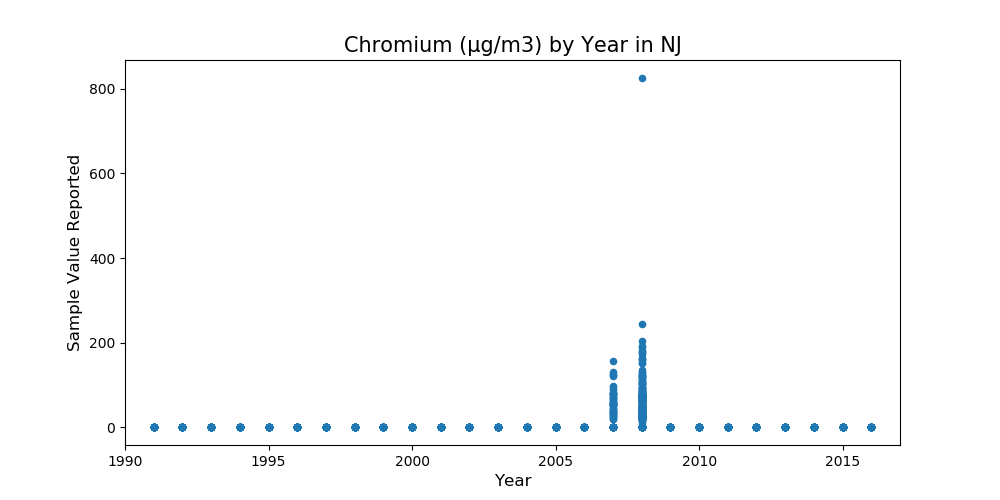

In [113]:
# Running inital plots to see what the data looks like and see an outlier in the data from the year 2008

chromium_df.plot.scatter(x='YEAR', y='SAMPLE_VALUE_REPORTED', figsize=(10,5))
plt.xlim(1990,2017)
plt.title('Chromium (µg/m3) by Year in NJ', size=15)
plt.xlabel('Year', size=12)
plt.ylabel('Sample Value Reported', size=12)
plt.savefig('Images/chromium_sample_value_reported_year.png')

In [10]:
#separating the programs into their own respective datasets

PM2_program_df = chromium_df.loc[chromium_df["PROGRAM"] =="PM2.5 SPECIATION NETWORK"]
PM2_program_df.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
992,PM2.5 SPECIATION NETWORK,2003,1,15-Jan-03,00:00,24 HOURS,0.00176,UG/CU METER (LC),L,0.0023,6058,39.923042,-75.097617
993,PM2.5 SPECIATION NETWORK,2003,1,10-Mar-03,00:00,24 HOURS,0.00245,UG/CU METER (LC),L,0.0020,6058,39.923042,-75.097617
994,PM2.5 SPECIATION NETWORK,2002,4,28-Nov-02,00:00,24 HOURS,NaN,UG/CU METER (LC),L,0.0015,6058,39.923042,-75.097617
995,PM2.5 SPECIATION NETWORK,2002,4,01-Dec-02,00:00,24 HOURS,0.00176,UG/CU METER (LC),L,0.0023,6058,39.923042,-75.097617
996,PM2.5 SPECIATION NETWORK,2002,4,04-Dec-02,00:00,24 HOURS,NaN,UG/CU METER (LC),L,0.0015,6058,39.923042,-75.097617


In [114]:
sorted_date_PM2 = PM2_program_df.sort_values("YEAR", ascending=False)
sorted_date_PM2.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
9652,PM2.5 SPECIATION NETWORK,2016,1,31-Mar-16,00:00,24 HOURS,-0.00053,UG/CU METER (LC),L,0.00366,3685,40.641440,-74.208365
6260,PM2.5 SPECIATION NETWORK,2016,3,20-Jul-16,00:00,24 HOURS,0.00960,UG/CU METER (LC),L,0.00367,3453,40.720989,-74.192892
6248,PM2.5 SPECIATION NETWORK,2016,2,14-Jun-16,00:00,24 HOURS,0.00385,UG/CU METER (LC),L,0.00368,3453,40.720989,-74.192892
6249,PM2.5 SPECIATION NETWORK,2016,2,20-Jun-16,00:00,24 HOURS,-0.00046,UG/CU METER (LC),L,0.00366,3453,40.720989,-74.192892
6250,PM2.5 SPECIATION NETWORK,2016,3,28-Aug-16,00:00,24 HOURS,0.00306,UG/CU METER (LC),L,0.00367,3453,40.720989,-74.192892


In [115]:
# grouping the dataset by Year and checking the max values for the program by year

grouped_city= PM2_program_df.groupby(["YEAR"])

year = pd.DataFrame(grouped_city["SAMPLE_VALUE_REPORTED"].max())

year.head()

,SAMPLE_VALUE_REPORTED
YEAR,
2001,0.0322
2002,0.0539
2003,0.0343
2004,0.0566
2005,0.2790


In [116]:
#listing the unique coordinates for plotting in gmaps

coordinates = [
    (40.64144, -74.208365),
    (40.720989, -74.192892),
    (40.472825, -74.422403),
    (40.787628, -74.676301),
    (39.923042, -75.097617)
]

In [117]:
# setting the layout for the gmaps plot

figure_layout = {
    'width': '800px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [118]:
# setting the markers and plotting them into the gmap

markers = gmaps.marker_layer(coordinates)

fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [119]:
# creating the dataset for the IMPROVE program

improve_program_df = chromium_df.loc[chromium_df["PROGRAM"] =="IMPROVE"]
improve_program_df.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,SAMPLE_VALUE_STD_FINAL_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,IMPROVE,2014,4,14-Oct-14,00:00,24 HOURS,0.0001,UG/CU METER (LC),L,0.0001,0.0001,3044,39.464872,-74.448736
1,IMPROVE,2014,4,25-Nov-14,00:00,24 HOURS,0.0002,UG/CU METER (LC),L,0.0001,0.0002,3044,39.464872,-74.448736
2,IMPROVE,2014,3,02-Sep-14,00:00,24 HOURS,0.0005,UG/CU METER (LC),L,0.0001,0.0005,3044,39.464872,-74.448736
3,IMPROVE,2014,3,05-Sep-14,00:00,24 HOURS,0.0003,UG/CU METER (LC),L,0.0001,0.0003,3044,39.464872,-74.448736
4,IMPROVE,2014,3,08-Sep-14,00:00,24 HOURS,0.0001,UG/CU METER (LC),L,0.0001,0.0001,3044,39.464872,-74.448736


In [120]:
# sorting the dataset by year

sorted_date_improve = improve_program_df.sort_values("YEAR", ascending=False)
sorted_date_improve.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,SAMPLE_VALUE_STD_FINAL_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
267,IMPROVE,2016,4,02-Dec-16,00:00,24 HOURS,0.00007,UG/CU METER (LC),L,0.00015,0.00007,3044,39.464872,-74.448736
287,IMPROVE,2016,3,08-Jul-16,00:00,24 HOURS,0.00029,UG/CU METER (LC),L,0.00016,0.00029,3044,39.464872,-74.448736
285,IMPROVE,2016,3,02-Jul-16,00:00,24 HOURS,0.00002,UG/CU METER (LC),L,0.00015,0.00002,3044,39.464872,-74.448736
284,IMPROVE,2016,2,29-Jun-16,00:00,24 HOURS,0.00008,UG/CU METER (LC),L,0.00012,0.00008,3044,39.464872,-74.448736
283,IMPROVE,2016,2,26-Jun-16,00:00,24 HOURS,0.00012,UG/CU METER (LC),L,0.00012,0.00012,3044,39.464872,-74.448736


In [121]:
# grouping the dataset by Year and checking out the max values per Year

grouped_city= improve_program_df.groupby(["YEAR"])

year = pd.DataFrame(grouped_city["SAMPLE_VALUE_REPORTED"].max())

year.head()

,SAMPLE_VALUE_REPORTED
YEAR,
1991,0.00045
1992,0.00093
1993,0.00322
1994,0.00275
1995,0.00555


In [122]:
# creating the dataset for the Community-Scale Monitoring program

community_program_df = chromium_df.loc[chromium_df["PROGRAM"] =="COMMUNITY-SCALE MONITORING"]
community_program_df.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,SAMPLE_VALUE_STD_FINAL_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
310,COMMUNITY-SCALE MONITORING,2008,2,05-Jun-08,00:00,24 HOURS,36.641,Nanograms/cubic meter (LC),L,0.000002,0.036641,6127,40.817218,-74.043758
312,COMMUNITY-SCALE MONITORING,2008,1,13-Mar-08,00:00,24 HOURS,73.458,Nanograms/cubic meter (LC),L,0.000002,0.073458,6127,40.817218,-74.043758
313,COMMUNITY-SCALE MONITORING,2008,1,19-Mar-08,00:00,24 HOURS,76.403,Nanograms/cubic meter (LC),L,0.000002,0.076403,6127,40.817218,-74.043758
314,COMMUNITY-SCALE MONITORING,2008,1,25-Mar-08,00:00,24 HOURS,47.462,Nanograms/cubic meter (LC),L,0.000002,0.047462,6127,40.817218,-74.043758
315,COMMUNITY-SCALE MONITORING,2008,1,31-Mar-08,00:00,24 HOURS,68.641,Nanograms/cubic meter (LC),L,0.000002,0.068641,6127,40.817218,-74.043758


In [123]:
# sorting the dataset by Year

sorted_date_community = community_program_df.sort_values("YEAR", ascending=False)
sorted_date_community.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,SAMPLE_VALUE_STD_FINAL_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
310,COMMUNITY-SCALE MONITORING,2008,2,05-Jun-08,00:00,24 HOURS,36.641,Nanograms/cubic meter (LC),L,0.000002,0.036641,6127,40.817218,-74.043758
1649,COMMUNITY-SCALE MONITORING,2008,1,08-Mar-08,06:00,12 HOUR,33.842,Nanograms/cubic meter (LC),L,0.000002,0.033842,6127,40.817218,-74.043758
1636,COMMUNITY-SCALE MONITORING,2008,1,29-Feb-08,00:00,24 HOURS,40.047,Nanograms/cubic meter (LC),L,0.000002,0.040047,6127,40.816809,-74.043673
1637,COMMUNITY-SCALE MONITORING,2008,1,23-Feb-08,00:00,24 HOURS,NaN,Nanograms/cubic meter (LC),L,0.000002,NaN,6127,40.816809,-74.043673
1638,COMMUNITY-SCALE MONITORING,2008,1,17-Feb-08,00:00,24 HOURS,NaN,Nanograms/cubic meter (LC),L,0.000002,NaN,6127,40.816809,-74.043673


In [124]:
# grouping the dataset by Year and checking the max values for each Year

grouped_city= community_program_df.groupby(["YEAR"])

year = pd.DataFrame(grouped_city["SAMPLE_VALUE_REPORTED"].max())

year.head()

,SAMPLE_VALUE_REPORTED
YEAR,
2007,157.163
2008,826.511


In [125]:
# creating a dataset for the CSN Supplemental program

csn_program_df = chromium_df.loc[chromium_df["PROGRAM"] =="CSN SUPPLEMENTAL"]
csn_program_df.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,SAMPLE_VALUE_STD_FINAL_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
1148,CSN SUPPLEMENTAL,2016,4,09-Oct-16,00:00,24 HOURS,0.01815,UG/CU METER (LC),L,0.00364,0.01815,2328,39.934446,-75.125291
1149,CSN SUPPLEMENTAL,2016,4,15-Oct-16,00:00,24 HOURS,0.00287,UG/CU METER (LC),L,0.00365,0.00287,2328,39.934446,-75.125291
1150,CSN SUPPLEMENTAL,2016,4,21-Oct-16,00:00,24 HOURS,0.00355,UG/CU METER (LC),L,0.00361,0.00355,2328,39.934446,-75.125291
1151,CSN SUPPLEMENTAL,2016,4,27-Oct-16,00:00,24 HOURS,0.00364,UG/CU METER (LC),L,0.00366,0.00364,2328,39.934446,-75.125291
1152,CSN SUPPLEMENTAL,2016,4,02-Nov-16,00:00,24 HOURS,0.00393,UG/CU METER (LC),L,0.00364,0.00393,2328,39.934446,-75.125291


In [126]:
# sorting the dataset by Year

sorted_date_csn = csn_program_df.sort_values("YEAR", ascending=False)
sorted_date_csn.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,SAMPLE_VALUE_STD_FINAL_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
1148,CSN SUPPLEMENTAL,2016,4,09-Oct-16,00:00,24 HOURS,0.01815,UG/CU METER (LC),L,0.00364,0.01815,2328,39.934446,-75.125291
1811,CSN SUPPLEMENTAL,2016,2,17-Jun-16,00:00,24 HOURS,NaN,UG/CU METER (LC),L,0.00344,NaN,2328,39.934446,-75.125291
1821,CSN SUPPLEMENTAL,2016,2,29-Jun-16,00:00,24 HOURS,0.00712,UG/CU METER (LC),L,0.00359,0.00712,2328,39.934446,-75.125291
1820,CSN SUPPLEMENTAL,2016,3,16-Aug-16,00:00,24 HOURS,0.00139,UG/CU METER (LC),L,0.00357,0.00139,2328,39.934446,-75.125291
1819,CSN SUPPLEMENTAL,2016,2,23-Jun-16,00:00,24 HOURS,NaN,UG/CU METER (LC),L,0.00344,NaN,2328,39.934446,-75.125291


In [127]:
# grouping the dataset by Year and checking max values for each Year

grouped_city= csn_program_df.groupby(["YEAR"])

year = pd.DataFrame(grouped_city["SAMPLE_VALUE_REPORTED"].max())

year.head()

,SAMPLE_VALUE_REPORTED
YEAR,
2013,0.05110
2014,0.11300
2015,0.03350
2016,0.05085


In [128]:
# creating the dataset for the SLAMS program

slams_program_df = chromium_df.loc[chromium_df["PROGRAM"] =="SLAMS"]
slams_program_df.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,SAMPLE_VALUE_STD_FINAL_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
5708,SLAMS,2016,4,02-Nov-16,00:00,24 HOURS,0.00406,UG/CU METER (LC),L,0.00367,0.00406,5231,40.462182,-74.429439
5710,SLAMS,2016,4,29-Nov-16,00:00,24 HOURS,0.00159,UG/CU METER (LC),L,0.00367,0.00159,5231,40.462182,-74.429439
5711,SLAMS,2016,4,02-Dec-16,00:00,24 HOURS,NaN,UG/CU METER (LC),L,0.00367,NaN,5231,40.462182,-74.429439
5712,SLAMS,2016,4,08-Dec-16,00:00,24 HOURS,0.01855,UG/CU METER (LC),L,0.00367,0.01855,5231,40.462182,-74.429439
5713,SLAMS,2016,4,11-Dec-16,00:00,24 HOURS,0.02432,UG/CU METER (LC),L,0.00367,0.02432,5231,40.462182,-74.429439


In [129]:
# sorting the dataset by Year

sorted_date_slams = slams_program_df.sort_values("YEAR", ascending=False)
sorted_date_slams.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,SAMPLE_VALUE_STD_FINAL_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
5708,SLAMS,2016,4,02-Nov-16,00:00,24 HOURS,0.00406,UG/CU METER (LC),L,0.00367,0.00406,5231,40.462182,-74.429439
5710,SLAMS,2016,4,29-Nov-16,00:00,24 HOURS,0.00159,UG/CU METER (LC),L,0.00367,0.00159,5231,40.462182,-74.429439
5735,SLAMS,2016,4,14-Nov-16,00:00,24 HOURS,0.00181,UG/CU METER (LC),L,0.00367,0.00181,5231,40.462182,-74.429439
5736,SLAMS,2016,4,08-Nov-16,00:00,24 HOURS,0.00088,UG/CU METER (LC),L,0.00367,0.00088,5231,40.462182,-74.429439
5737,SLAMS,2016,4,17-Nov-16,00:00,24 HOURS,0.01003,UG/CU METER (LC),L,0.00367,0.01003,5231,40.462182,-74.429439


In [130]:
# grouping the program data by Year and checking max values for each Year

grouped_city= slams_program_df.groupby(["YEAR"])

year = pd.DataFrame(grouped_city["SAMPLE_VALUE_REPORTED"].max())

year.head()

,SAMPLE_VALUE_REPORTED
YEAR,
2016,0.0249


In [131]:
# Creating a dataset that has values based on the AQI (Air Quality Index) breakpoints. 
# This one is for what is considered level of health concern for "sensitive groups" air quality

breakpoints_sensitive = chromium_df.loc[(chromium_df["SAMPLE_VALUE_REPORTED"]>35.5) &
                                        (chromium_df["SAMPLE_VALUE_REPORTED"]<= 55.4)]
breakpoints_sensitive = pd.DataFrame(breakpoints_sensitive)
breakpoints_sensitive.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,SAMPLE_VALUE_STD_FINAL_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
310,COMMUNITY-SCALE MONITORING,2008,2,05-Jun-08,00:00,24 HOURS,36.641,Nanograms/cubic meter (LC),L,0.000002,0.036641,6127,40.817218,-74.043758
314,COMMUNITY-SCALE MONITORING,2008,1,25-Mar-08,00:00,24 HOURS,47.462,Nanograms/cubic meter (LC),L,0.000002,0.047462,6127,40.817218,-74.043758
317,COMMUNITY-SCALE MONITORING,2008,2,12-Apr-08,00:00,24 HOURS,44.975,Nanograms/cubic meter (LC),L,0.000002,0.044975,6127,40.817218,-74.043758
322,COMMUNITY-SCALE MONITORING,2008,2,12-May-08,00:00,24 HOURS,51.231,Nanograms/cubic meter (LC),L,0.000002,0.051231,6127,40.817218,-74.043758
323,COMMUNITY-SCALE MONITORING,2008,2,18-May-08,00:00,24 HOURS,55.226,Nanograms/cubic meter (LC),L,0.000002,0.055226,6127,40.817218,-74.043758


In [132]:
# Seeing which programs recorded these "sensitive" breakpoints and only one program did

program_count = breakpoints_sensitive["PROGRAM"].value_counts()
program_count.head()

COMMUNITY-SCALE MONITORING    59
Name: PROGRAM, dtype: int64

In [133]:
# Checking to see which years this data was recorded

year_count = breakpoints_sensitive["YEAR"].value_counts()
year_count

2008    45
2007    14
Name: YEAR, dtype: int64

In [134]:
# Plotting this data onto gmaps

locations = breakpoints_sensitive[['MONITOR_LATITUDE', 'MONITOR_LONGITUDE']]
weights = breakpoints_sensitive['SAMPLE_VALUE_REPORTED']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

In [135]:
# Creating a dataset that is based on values considered to be "unhealthy" based on the AQI (Air Quality Index) breakpoints.

breakpoints_unhealthy = chromium_df.loc[(chromium_df["SAMPLE_VALUE_REPORTED"]>=55.5) &
                              (chromium_df["SAMPLE_VALUE_REPORTED"]<= 150.4)]
breakpoints_unhealthy= pd.DataFrame(breakpoints_unhealthy)

breakpoints_unhealthy.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,SAMPLE_VALUE_STD_FINAL_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
312,COMMUNITY-SCALE MONITORING,2008,1,13-Mar-08,00:00,24 HOURS,73.458,Nanograms/cubic meter (LC),L,0.000002,0.073458,6127,40.817218,-74.043758
313,COMMUNITY-SCALE MONITORING,2008,1,19-Mar-08,00:00,24 HOURS,76.403,Nanograms/cubic meter (LC),L,0.000002,0.076403,6127,40.817218,-74.043758
315,COMMUNITY-SCALE MONITORING,2008,1,31-Mar-08,00:00,24 HOURS,68.641,Nanograms/cubic meter (LC),L,0.000002,0.068641,6127,40.817218,-74.043758
320,COMMUNITY-SCALE MONITORING,2008,2,30-Apr-08,00:00,24 HOURS,108.443,Nanograms/cubic meter (LC),L,0.000002,0.108443,6127,40.817218,-74.043758
325,COMMUNITY-SCALE MONITORING,2008,3,11-Jul-08,00:00,24 HOURS,75.764,Nanograms/cubic meter (LC),L,0.000002,0.075764,6127,40.817218,-74.043758


In [136]:
# Checking which programs measured this data

program_count = breakpoints_unhealthy["PROGRAM"].value_counts()
program_count

COMMUNITY-SCALE MONITORING    110
Name: PROGRAM, dtype: int64

In [137]:
# Checking which years this data was recorded

year_count = breakpoints_unhealthy["YEAR"].value_counts()
year_count

2008    86
2007    24
Name: YEAR, dtype: int64

In [138]:
# Plotting this data onto a gmap

locations = breakpoints_unhealthy[['MONITOR_LATITUDE', 'MONITOR_LONGITUDE']]
weights = breakpoints_unhealthy['SAMPLE_VALUE_REPORTED']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

In [139]:
# Creating a dataset that is based on values considered to be "very unhealthy" based on the AQI (Air Quality Index) breakpoints

breakpoints_veryunhealthy = chromium_df.loc[(chromium_df["SAMPLE_VALUE_REPORTED"]>=150.5) &
                              (chromium_df["SAMPLE_VALUE_REPORTED"]<= 250.4)]

breakpoints_veryunhealthy.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,SAMPLE_VALUE_STD_FINAL_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
318,COMMUNITY-SCALE MONITORING,2008,2,18-Apr-08,00:00,24 HOURS,243.557,Nanograms/cubic meter (LC),L,0.000002,0.243557,6127,40.817218,-74.043758
319,COMMUNITY-SCALE MONITORING,2008,2,24-Apr-08,00:00,24 HOURS,158.336,Nanograms/cubic meter (LC),L,0.000002,0.158336,6127,40.817218,-74.043758
321,COMMUNITY-SCALE MONITORING,2008,2,06-May-08,00:00,24 HOURS,160.772,Nanograms/cubic meter (LC),L,0.000002,0.160772,6127,40.817218,-74.043758
346,COMMUNITY-SCALE MONITORING,2007,3,21-Sep-07,00:00,24 HOURS,157.163,Nanograms/cubic meter (LC),L,0.000002,0.157163,6127,40.817218,-74.043758
359,COMMUNITY-SCALE MONITORING,2008,1,05-Feb-08,00:00,24 HOURS,189.486,Nanograms/cubic meter (LC),L,0.000002,0.189486,6127,40.817218,-74.043758


In [140]:
# Checking which programs recorded this data

program_count = breakpoints_veryunhealthy["PROGRAM"].value_counts()
program_count

COMMUNITY-SCALE MONITORING    15
Name: PROGRAM, dtype: int64

In [141]:
# Seeing which years this data was recorded

year_count = breakpoints_veryunhealthy["YEAR"].value_counts()
year_count

2008    14
2007     1
Name: YEAR, dtype: int64

In [142]:
# Plotting this data onto a gmap

locations = breakpoints_veryunhealthy[['MONITOR_LATITUDE', 'MONITOR_LONGITUDE']]
weights = breakpoints_veryunhealthy['SAMPLE_VALUE_REPORTED']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

In [143]:
# Creating a dataset based on which values are considered "hazardous" based on the AQI (Air Quality Index) breakpoints
# Only one value was recorded for this
breakpoints_hazardous = chromium_df.loc[(chromium_df["SAMPLE_VALUE_REPORTED"]>=250.5)]

breakpoints_hazardous

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,SAMPLE_VALUE_STD_FINAL_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
326,COMMUNITY-SCALE MONITORING,2008,3,03-Sep-08,00:00,24 HOURS,826.511,Nanograms/cubic meter (LC),L,0.000002,0.826511,6127,40.817218,-74.043758


In [144]:
# Checking which programs recorded this data

program_count = breakpoints_hazardous["PROGRAM"].value_counts()
program_count

COMMUNITY-SCALE MONITORING    1
Name: PROGRAM, dtype: int64

In [145]:
# Checking which year it was recorded

year_count = breakpoints_hazardous["YEAR"].value_counts()
year_count

2008    1
Name: YEAR, dtype: int64

In [146]:
# Plotting the data onto a gmap

locations = breakpoints_hazardous[['MONITOR_LATITUDE', 'MONITOR_LONGITUDE']]
weights = breakpoints_hazardous['SAMPLE_VALUE_REPORTED']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

In [147]:
# Pulling out all the unique corrdinates in the dataset and appending it to a list,
# Then using citipy to check for the city based on the coordinates and append it to another list

coordinates = []
for index, row in chromium_df.iterrows(): 
    if (row['MONITOR_LATITUDE'], row['MONITOR_LONGITUDE']) not in coordinates:
        coordinates.append((row['MONITOR_LATITUDE'],row['MONITOR_LONGITUDE']))
print(coordinates)
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
# cities
city_names = []
for city in cities:
    city_names.append(city.city_name)
city_names

[(39.464872, -74.448736), (40.817218, -74.043758), (39.923041999999995, -75.097617), (39.934446, -75.125291), (40.833110999999995, -74.043459), (40.816809, -74.043673), (40.472825, -74.422403), (40.787628000000005, -74.676301), (40.462182, -74.429439), (40.720989, -74.192892), (40.64144, -74.208365)]


['brigantine',
 'secaucus',
 'camden',
 'camden',
 'little ferry',
 'secaucus',
 'highland park',
 'hopatcong',
 'new brunswick',
 'newark',
 'elizabeth']

In [148]:
# Creating a dataset that combines the coordinates and city names

city_data = pd.DataFrame({'Coordinates':coordinates,'City Name': city_names})
city_data

# Creating a for loop that checks which longitude belongs to which city, then appends that to another list,
# To then be appended as a new column in the original dataframe
city_index = []
for index, row in chromium_df.iterrows():
    for cindex, crow in city_data.iterrows():
        if crow['Coordinates'][1] == row['MONITOR_LONGITUDE']:
            city_index.append(crow['City Name'])
            continue
chromium_df['City'] = city_index            
chromium_df.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,SAMPLE_VALUE_STD_FINAL_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,City
0,IMPROVE,2014,4,14-Oct-14,00:00,24 HOURS,0.0001,UG/CU METER (LC),L,0.0001,0.0001,3044,39.464872,-74.448736,brigantine
1,IMPROVE,2014,4,25-Nov-14,00:00,24 HOURS,0.0002,UG/CU METER (LC),L,0.0001,0.0002,3044,39.464872,-74.448736,brigantine
2,IMPROVE,2014,3,02-Sep-14,00:00,24 HOURS,0.0005,UG/CU METER (LC),L,0.0001,0.0005,3044,39.464872,-74.448736,brigantine
3,IMPROVE,2014,3,05-Sep-14,00:00,24 HOURS,0.0003,UG/CU METER (LC),L,0.0001,0.0003,3044,39.464872,-74.448736,brigantine
4,IMPROVE,2014,3,08-Sep-14,00:00,24 HOURS,0.0001,UG/CU METER (LC),L,0.0001,0.0001,3044,39.464872,-74.448736,brigantine


In [149]:
# Grouping the dataset based on City and checking for max values in each City and we see Secaucus has a huge max value

grouped_city= chromium_df.groupby(["City"])

city = pd.DataFrame(grouped_city["SAMPLE_VALUE_REPORTED"].max())

city

,SAMPLE_VALUE_REPORTED
City,
brigantine,0.0112
camden,0.1130
elizabeth,0.2790
highland park,0.5240
hopatcong,0.1900
little ferry,180.1990
new brunswick,0.0249
newark,0.6060
secaucus,826.5110


In [150]:
# Creating a City list to be used for plotting

# city_list = grouped_city['City'].value_counts()
# city_list
city_list = ['Brigantine', 'Camden', 'Elizabeth', 
             'Highland Park', 'Hopatcong', 'Little Ferry', 'New Brunswick','Newark','Seacaucus']

<IPython.core.display.Javascript object>


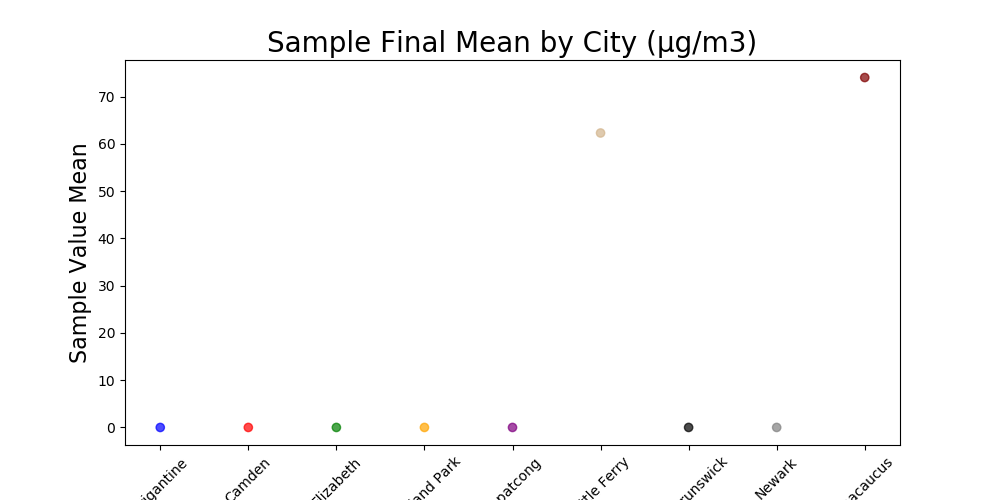

In [151]:
# Plotting out sample means by City and Little Ferry and Secaucus have means that are really high
# and so the other ones are so small they can't be differentiated on the plot
colors=['blue', 'red', 'green', 'orange','purple','tan', 'black', 'gray','maroon']
plt.figure(figsize=(10,5))
plt.scatter(city_list,grouped_city['SAMPLE_VALUE_REPORTED'].mean(), alpha=0.7, color =colors)
# plt.xlim(1989,2017)
plt.title('Sample Final Mean by City (µg/m3)', size=20)
plt.xlabel('City', size=16)
plt.xticks(rotation=45)
plt.ylabel('Sample Value Mean', size=16)
plt.savefig('Images/chromium_Sample_Final_Mean_by_City.png')

In [152]:
# Grouping the dataset by City, Year, and Program and checking out the max values

grouped_city= chromium_df.groupby(["City", "YEAR", "PROGRAM"])

year = pd.DataFrame(grouped_city["SAMPLE_VALUE_REPORTED"].max())

year.head()

SAMPLE_VALUE_REPORTED
City       YEAR PROGRAM                       
brigantine 1991 IMPROVE                0.00045
           1992 IMPROVE                0.00093
           1993 IMPROVE                0.00322
           1994 IMPROVE                0.00275
           1995 IMPROVE                0.00555

In [153]:
# flattening groupby into a level df

clean_means = year.reset_index().pivot('YEAR','City','SAMPLE_VALUE_REPORTED')
clean_means

City,brigantine,camden,elizabeth,highland park,hopatcong,little ferry,new brunswick,newark,secaucus
YEAR,,,,,,,,,
1991,0.00045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,0.00093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,0.00322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,0.00275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,0.00555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,0.01003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,0.00540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,0.00468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,0.00614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


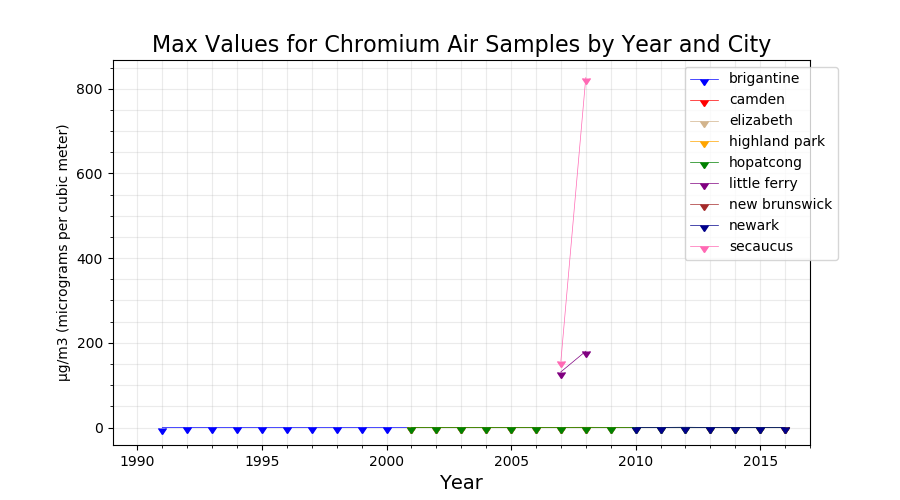

In [154]:
# Plotting out max values by City and Year, and Little Ferry and Secaucus have maxes that are really high
# and so the other ones are so small they can't be differentiated on the plot unless zoomed in

colors = ['blue', 'red', 'tan', 'orange', 'green', 'purple', 'brown', 'darkblue', 'hotpink']
clean_means.plot(sharex='all', figsize=(9,5), color=colors, marker=11, linewidth=0.5)
plt.grid(b=None, which='both', axis='both', alpha=0.25)
plt.legend(bbox_to_anchor=(1.05,1))
plt.ylabel('µg/m3 (micrograms per cubic meter)', size=10)
plt.xlabel('Year', size=14)
plt.xlim(1989,2017)
plt.minorticks_on()
plt.title('Max Values for Chromium Air Samples by Year and City', size=16)
plt.savefig('Images/chromium_max_values_per_city.png')

<a id='Benzene-Data'></a>

# Benzene Data

In [52]:
# Importing benzene data set already cleaned

benzenepath = "Database/Benzene/benzene_clean_full.csv"
benzene_clean = pd.read_csv(benzenepath)
benzene_clean.head()

/Users/SilverSurfer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,AQS_UNIT_CODE,UNIT_DESC,...,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,MDL_TYPE,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,Day,Month,Year Abbrev,City
0,0,SLAMS,2016,3,16-Sep-16,17:00,1 HOUR,0.139,8,PARTS PER BILLION,...,L,0.319486,FEDERAL_MDL,3685,40.64144,-74.208365,16,Sep,16,elizabeth
1,1,SLAMS,2016,3,18-Sep-16,15:00,1 HOUR,0.384,8,PARTS PER BILLION,...,L,0.319486,FEDERAL_MDL,3685,40.64144,-74.208365,18,Sep,16,elizabeth
2,2,SLAMS,2016,3,17-Sep-16,07:00,1 HOUR,0.904,8,PARTS PER BILLION,...,L,0.319486,FEDERAL_MDL,3685,40.64144,-74.208365,17,Sep,16,elizabeth
3,3,SLAMS,2016,3,17-Sep-16,06:00,1 HOUR,0.814,8,PARTS PER BILLION,...,L,0.319486,FEDERAL_MDL,3685,40.64144,-74.208365,17,Sep,16,elizabeth
4,4,SLAMS,2016,3,17-Sep-16,05:00,1 HOUR,0.484,8,PARTS PER BILLION,...,L,0.319486,FEDERAL_MDL,3685,40.64144,-74.208365,17,Sep,16,elizabeth


In [158]:
# grouping the dataset by Year
year_group = benzene_clean.groupby(by='YEAR')

In [159]:
# Checking the mean values for each Year
year_group['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean()

YEAR
1990    3.847527
1991    3.245165
1992    4.663434
1993    3.420350
1994    4.043942
1995    0.742762
1996    0.898580
1997    0.968244
1998    0.839327
1999    0.722443
2000    0.682980
2001    0.675213
2002    0.615717
2003    0.680170
2004    0.574209
2005    0.525133
2006    0.461789
2007    0.406142
2008    0.506511
2009    0.307327
2010    0.291549
2011    0.252588
2012    0.242723
2013    0.237689
2014    0.236264
2015    0.423141
2016    0.798671
Name: SAMPLE_VALUE_STD_FINAL_UG_M3, dtype: float64

In [160]:
# Creating a list of the unique Years in the dataset
year_list = year_group['YEAR'].unique()

<IPython.core.display.Javascript object>


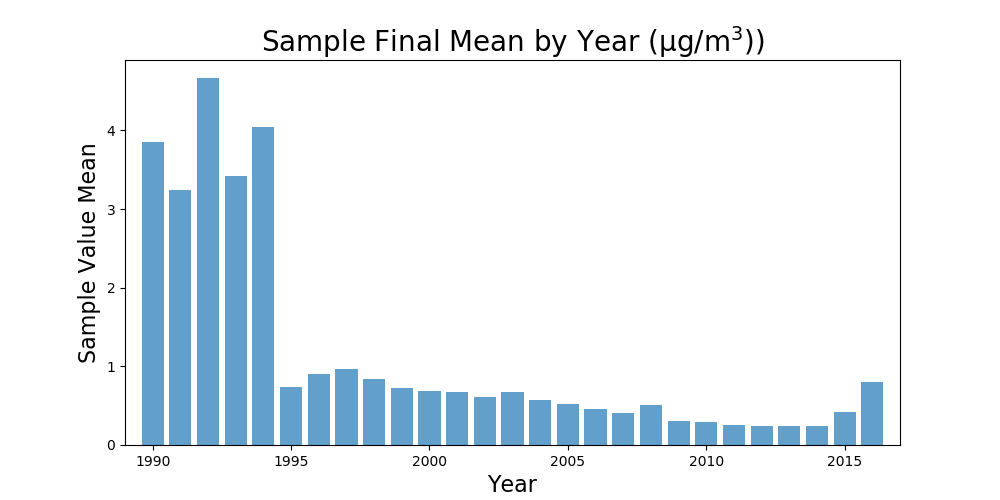

In [176]:
# Plotting the mean values of each year in a bar chart
plt.figure(figsize=(10,5))
plt.bar(year_list,year_group['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean(), alpha=0.7)
plt.xlim(1989,2017)
plt.title('Sample Final Mean by Year (μg/m$^3$))', size=20)
plt.xlabel('Year', size=16)
plt.ylabel('Sample Value Mean', size=16)
plt.savefig('Images/benzene_yearly_mean.png')

In [171]:
# Grouping data by cities and checking their mean values
city_group = benzene_clean.groupby('City')
city_group['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean()

City
bayonne             0.789630
camden              0.944523
darby               1.068948
elizabeth           1.292370
ewing               0.480158
fort lee            0.642609
harrison            3.263275
highland park       0.770077
hopatcong           0.557511
new brunswick       0.407624
newark              0.662322
north plainfield    4.350398
paterson            0.464650
Name: SAMPLE_VALUE_STD_FINAL_UG_M3, dtype: float64

In [172]:
# Creating a city list of all the unique cities
city_list = ['Bayonne', 'Camden', 'Darby','Elizabeth','Ewing','Fort Lee','Harrison','Highland Park','Hopcatong','New Brunswick','Newark','North Plainfield','Paterson']

In [173]:
# Grouping the dataset by Year and city and checking the mean values
city_year_group = benzene_clean.groupby(by=['YEAR', 'City'])
city_year_mean = pd.DataFrame(city_year_group['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean())
city_year_mean

SAMPLE_VALUE_STD_FINAL_UG_M3
YEAR City                                          
1990 camden                                4.219280
     harrison                              2.939274
     north plainfield                      3.475300
1991 camden                                3.394541
     harrison                              5.281108
...                                             ...
2016 elizabeth                             1.291118
     fort lee                              0.642609
     hopatcong                             0.339812
     new brunswick                         0.171683
     newark                                0.662322

[133 rows x 1 columns]

<IPython.core.display.Javascript object>


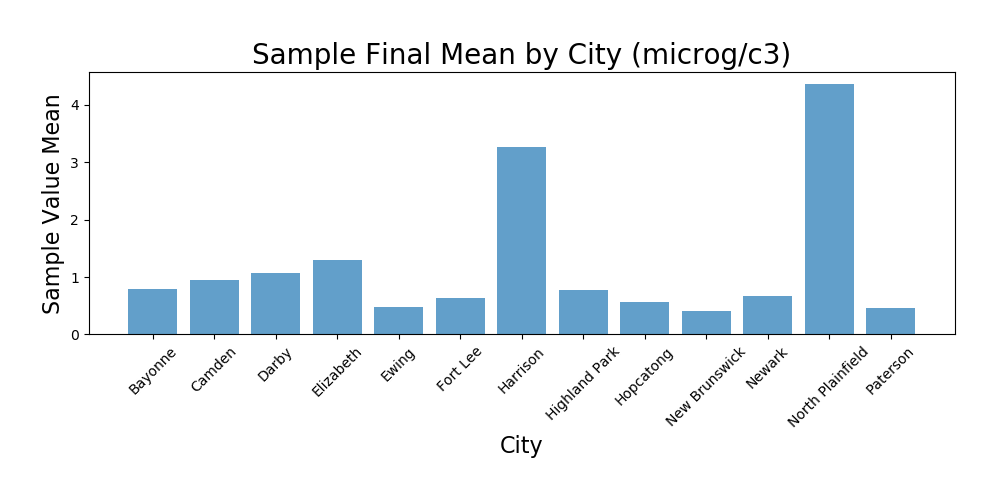

In [177]:
# Plotting the mean values for each city
plt.figure(figsize=(10,5))
plt.bar(city_list,city_group['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean(), alpha=0.7)
# plt.xlim(1989,2017)
plt.title('Sample Final Mean by City (microg/c3)', size=20)
plt.xlabel('City', size=16)
plt.xticks(rotation=45)
plt.ylabel('Sample Value Mean', size=16)
plt.tight_layout(pad=3)
plt.savefig('Images/benzene_mean_city.png')

<IPython.core.display.Javascript object>


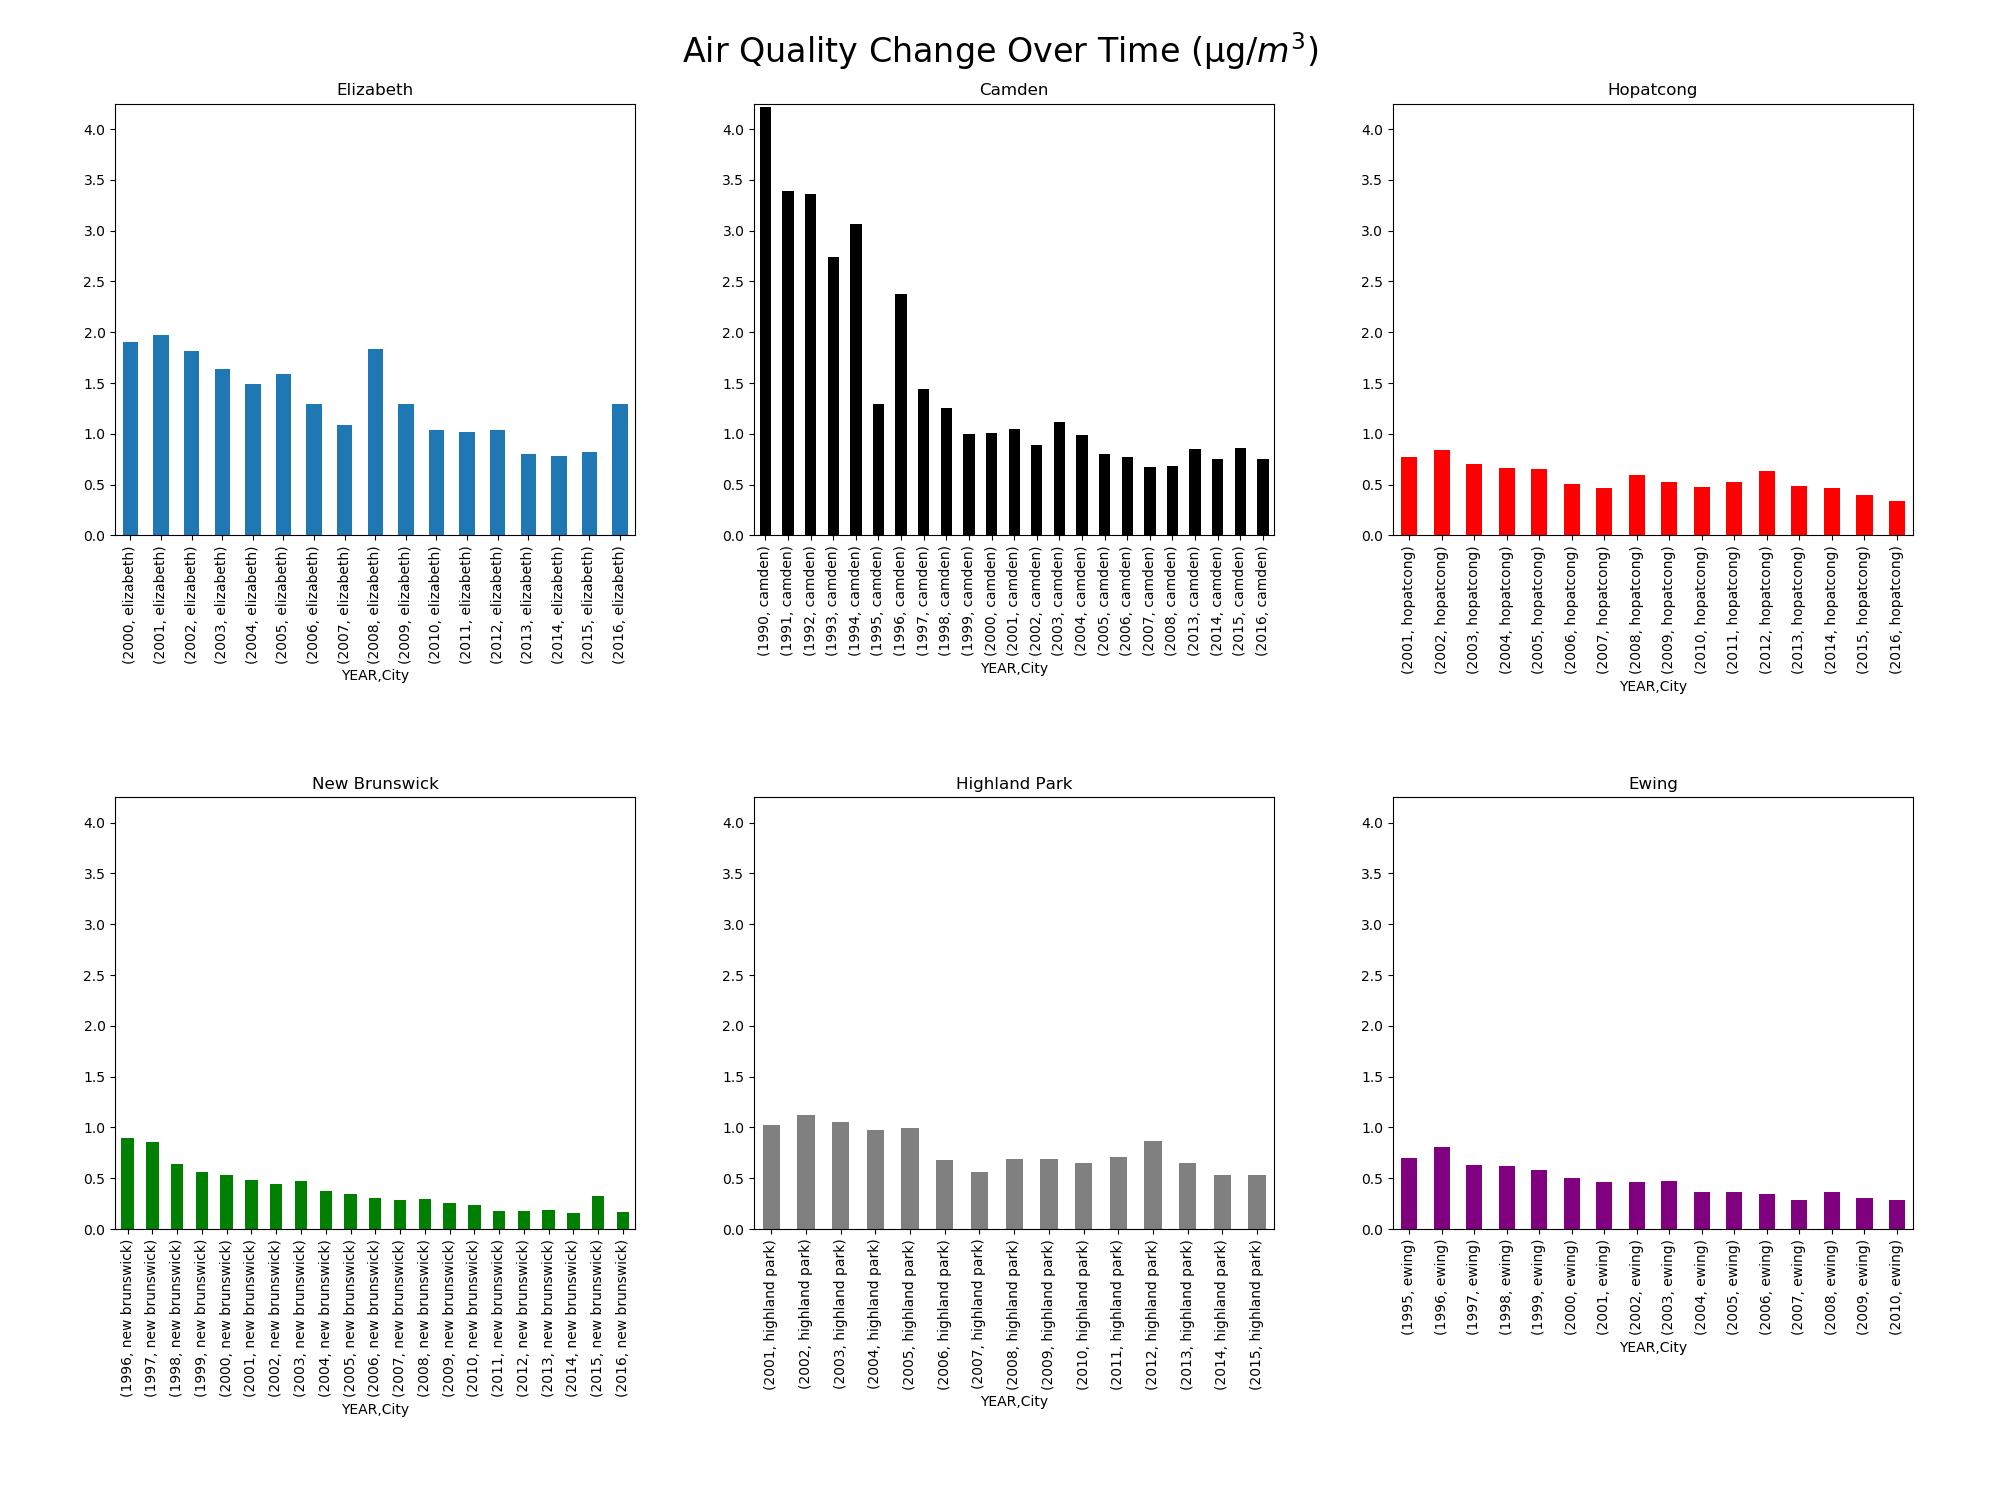

In [178]:
# Creating slices for each city that had more than 10 years in observations and then plotting them

elizabeth = pd.DataFrame(city_year_mean.query('City == [\'elizabeth\']'))
# elizabeth

camden = pd.DataFrame(city_year_mean.query('City == [\'camden\']'))
# camden

hopatcong = pd.DataFrame(city_year_mean.query('City == [\'hopatcong\']'))
# hopatcong

new_brunswick = pd.DataFrame(city_year_mean.query('City == [\'new brunswick\']'))
# new_brunswick

ewing = pd.DataFrame(city_year_mean.query('City == [\'ewing\']'))
# ewing

highland_park = pd.DataFrame(city_year_mean.query('City == [\'highland park\']'))
# highland_park

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
fig.suptitle("Air Quality Change Over Time (μg/$m^3$)", size = 24, va= 'top')

elizabeth.plot(kind='bar', ax=axes[0,0], ylim=(0,4.25), legend=False)
axes[0,0].set_title("Elizabeth")

camden.plot(kind='bar', color='black', ax=axes[0,1], ylim=(0,4.25), legend=False)
axes[0,1].set_title("Camden")

hopatcong.plot(kind='bar', color='red', ax=axes[0,2], ylim=(0,4.25), legend=False)
axes[0,2].set_title("Hopatcong")

new_brunswick.plot(kind='bar', color = 'green', ax=axes[1,0], ylim=(0,4.25), legend=False)
axes[1,0].set_title("New Brunswick")

highland_park.plot(kind='bar', color='gray', ax=axes[1,1], ylim=(0,4.25), legend=False)
axes[1,1].set_title("Highland Park")

ewing.plot(kind='bar', color='purple', ax=axes[1,2], ylim=(0,4.25), legend=False)
axes[1,2].set_title("Ewing")

# fig.subplots_adjust(hspace=0.45,wspace=0.1)
plt.tight_layout(pad=6)
plt.savefig('Images/benzene_air_quality_change_city.png')

In [207]:
# Pivoting and flattening MEAN table

clean_means_benzene = city_year_mean.reset_index().pivot('YEAR','City','SAMPLE_VALUE_STD_FINAL_UG_M3')
clean_means_benzene

City,bayonne,camden,darby,elizabeth,ewing,fort lee,harrison,highland park,hopatcong,new brunswick,newark,north plainfield,paterson
YEAR,,,,,,,,,,,,,
1990,NaN,4.219280,NaN,NaN,NaN,NaN,2.939274,NaN,NaN,NaN,NaN,3.475300,NaN
1991,NaN,3.394541,NaN,NaN,NaN,NaN,5.281108,NaN,NaN,NaN,NaN,0.518278,NaN
1992,NaN,3.359930,NaN,NaN,NaN,NaN,3.180663,NaN,NaN,NaN,NaN,7.884211,NaN
1993,NaN,2.745300,NaN,NaN,NaN,NaN,3.089255,NaN,NaN,NaN,NaN,4.326846,NaN
1994,NaN,3.070263,NaN,NaN,NaN,NaN,4.332766,NaN,NaN,NaN,NaN,7.334206,NaN
1995,NaN,1.297606,NaN,NaN,0.699019,NaN,2.405613,NaN,NaN,NaN,NaN,3.379455,NaN
1996,NaN,2.376486,NaN,NaN,0.803724,NaN,3.697927,NaN,NaN,0.900511,NaN,4.604152,NaN
1997,NaN,1.443910,NaN,NaN,0.631805,NaN,3.421698,NaN,NaN,0.859434,NaN,NaN,NaN
1998,NaN,1.258678,NaN,NaN,0.622826,NaN,NaN,NaN,NaN,0.640787,NaN,NaN,NaN


<IPython.core.display.Javascript object>


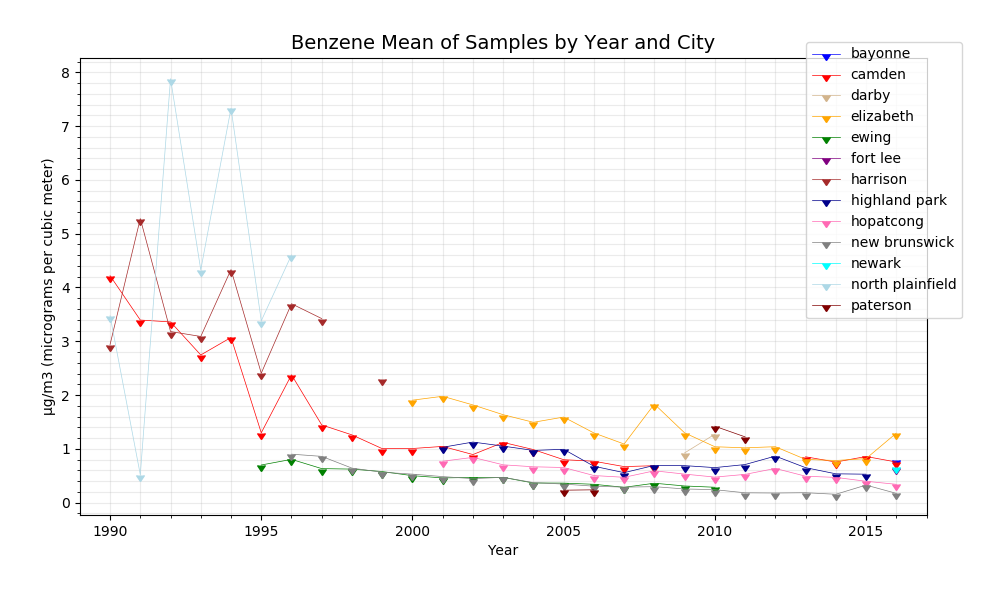

In [208]:
# Plotting the mean values for each city by year in a line chart

colors = ['blue', 'red', 'tan', 'orange', 'green', 'purple', 'brown', 'darkblue', 'hotpink', 'grey', 'aqua', 'lightblue', 'maroon']
clean_means_benzene.plot(sharex='all', figsize=(10,6), color=colors, marker=11, linewidth=0.5)
plt.grid(b=None, which='both', axis='both', alpha=0.25)
plt.legend(bbox_to_anchor=(1.05,1.05))
plt.ylabel('µg/m3 (micrograms per cubic meter)', size=10)
plt.xlabel('Year', size=10)
plt.xlim(1989,2017)
plt.minorticks_on()
plt.tight_layout(pad=3)
plt.title('Benzene Mean of Samples by Year and City', size=14)
plt.savefig('Images/benzene_mean_values_per_city.png')
plt.show()

<a id='Toluene-Data'></a>

# Toluene Data

In [65]:
# Reading database

toluene_clean = pd.read_csv("Database/Toluene/toluene_clean_with_cities.csv")
toluene_clean.head()

/Users/SilverSurfer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,PROGRAM,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DATA_SOURCE,...,AQS_UNIT_CODE,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,MDL_TYPE,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,City
0,0,SLAMS,3685,40.64144,-74.208365,2016,3,17-Sep-16,18:00,AQS_20171121,...,8,1,0.634496,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth
1,1,SLAMS,3685,40.64144,-74.208365,2016,3,17-Sep-16,05:00,AQS_20171121,...,8,1,4.265894,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth
2,2,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,09:00,AQS_20171121,...,8,1,2.103553,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth
3,3,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,08:00,AQS_20171121,...,8,1,2.332506,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth
4,4,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,07:00,AQS_20171121,...,8,1,2.042216,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth


In [66]:
# Grouping overall test result means by year

yearly = toluene_clean.groupby(by='YEAR')
year_group = yearly['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean()
year_group_db = pd.DataFrame(year_group)
year_group_db

,SAMPLE_VALUE_STD_FINAL_UG_M3
YEAR,
1990,10.865009
1991,17.910314
1992,17.469820
1993,12.581520
1994,13.681692
1995,2.379641
1996,4.041037
1997,3.616655
1998,3.285326


<IPython.core.display.Javascript object>


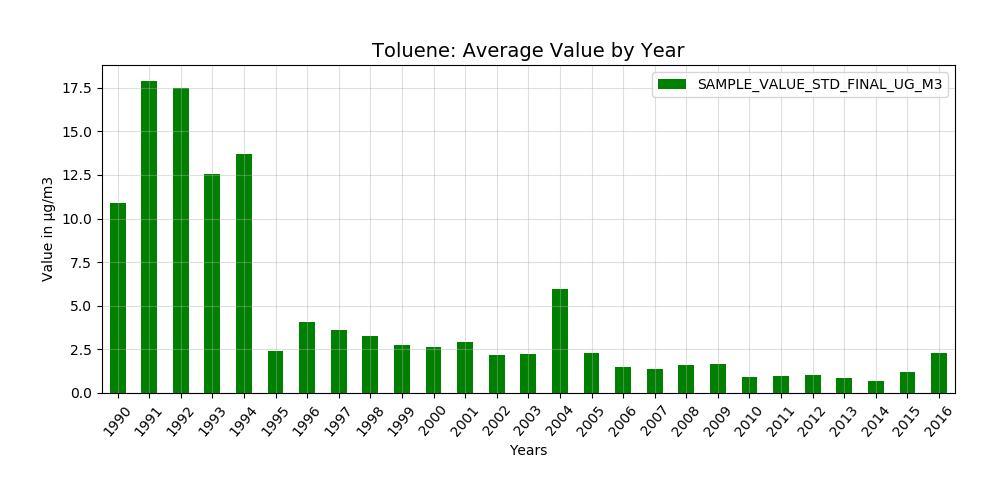

In [206]:
# Plotting by year
# ...might show there have been some change in regulation between 1994 and 1995?

ax = year_group_db.plot.bar(rot=0, figsize=(10,5), color='green')
plt.xlabel('Years', size=10)
plt.ylabel('Value in µg/m3', size=10)
plt.title('Toluene: Average Value by Year', size=14)
plt.grid(alpha=0.4)
plt.xticks(rotation=50)
plt.tight_layout(pad=3)
plt.savefig('Images/toluene_yearly_mean_across_all_data_sets.png')
plt.show()

In [68]:
# Grouping by location

latitude = toluene_clean.groupby(by='MONITOR_LATITUDE')
latitude_group = latitude['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean()
latitude_group_db = pd.DataFrame(latitude_group)
latitude_group_db

,SAMPLE_VALUE_STD_FINAL_UG_M3
MONITOR_LATITUDE,
39.837090,2.372627
39.923042,2.753091
39.934446,2.810341
40.283092,1.406715
40.462182,3.098485
40.472825,2.979197
40.598028,18.624098
40.601725,18.772494
40.641440,2.973165


<IPython.core.display.Javascript object>


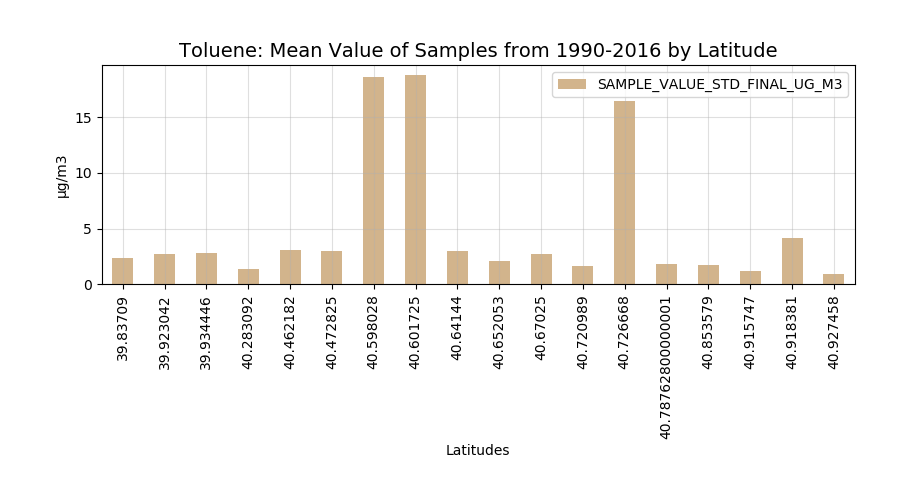

In [205]:
# Getting averages by location

ax = latitude_group_db.plot.bar(rot=0, figsize=(9,5), color='tan')
plt.xlabel('Latitudes', size=10)
plt.ylabel('µg/m3', size=10)
plt.title('Toluene: Mean Value of Samples from 1990-2016 by Latitude', size=14)
plt.grid(alpha=0.4)
plt.xticks(rotation=90)
plt.tight_layout(pad=3)
plt.savefig('Images/toluene_mean_by_latitude_bar.png')
plt.show()

In [70]:
# Getting averages per city for all the years

city_groupby = toluene_clean.groupby(by='City')
city_groupby = city_groupby['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean()
city_groupby_db = pd.DataFrame(city_groupby)
city_groupby_db

,SAMPLE_VALUE_STD_FINAL_UG_M3
City,
bayonne,2.686103
camden,2.765113
darby,2.372627
elizabeth,2.971632
ewing,1.406715
fort lee,1.720701
harrison,16.516229
highland park,2.979197
hopatcong,1.824185


<IPython.core.display.Javascript object>


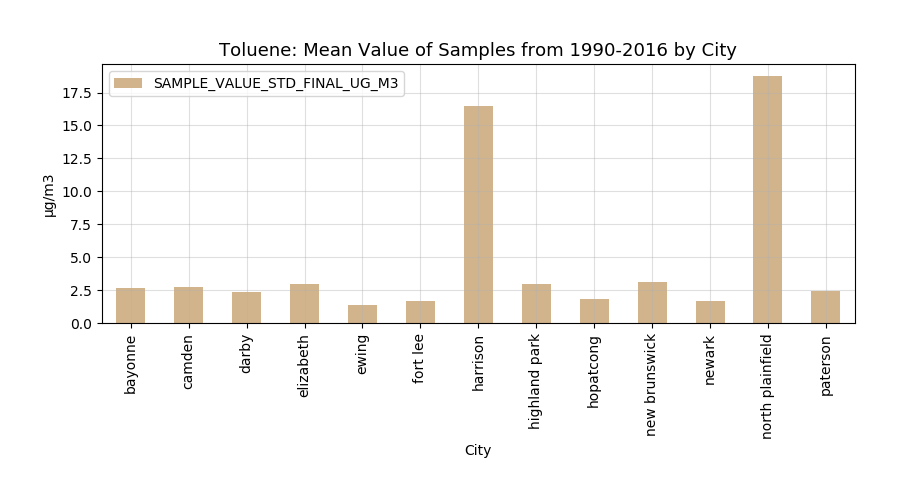

In [204]:
# Similar to the lat graph but organized by city

ax = city_groupby_db.plot.bar(rot=0, figsize=(9,5), color='tan')
plt.xlabel('City', size=10)
plt.ylabel('µg/m3', size=10)
plt.title('Toluene: Mean Value of Samples from 1990-2016 by City', size=13)
plt.grid(alpha=0.4)
plt.xticks(rotation=90)
plt.tight_layout(pad=3)
plt.savefig('Images/toluene_mean_by_city_bar.png')
plt.show()

In [72]:
# Multi-level index df (groupby) to get yearly MEAN by city

yearcity_groupby = toluene_clean.groupby(['City', 'YEAR'])['SAMPLE_VALUE_STD_FINAL_UG_M3']
mean_by_year = yearcity_groupby.mean()
mean_by_year_df = pd.DataFrame(mean_by_year)
mean_by_year_df.head()

SAMPLE_VALUE_STD_FINAL_UG_M3
City    YEAR                              
bayonne 2016                      2.686103
camden  1990                      8.306651
        1991                     20.145682
        1992                      9.176460
        1993                      7.367548

In [198]:
# Multi-level index df (groupby) to get yearly MAX by city

yearcity_groupby = toluene_clean.groupby(['City', 'YEAR'])['SAMPLE_VALUE_STD_FINAL_UG_M3']
max_by_year = yearcity_groupby.max()
max_by_year_df = pd.DataFrame(max_by_year)
max_by_year_df.head()

SAMPLE_VALUE_STD_FINAL_UG_M3
City    YEAR                              
bayonne 2016                     38.578051
camden  1990                     20.387947
        1991                    196.945304
        1992                     27.171367
        1993                     30.676134

In [199]:
# Pivoting and flattening MAX table

clean_max = max_by_year_df.reset_index().pivot('YEAR','City','SAMPLE_VALUE_STD_FINAL_UG_M3')
clean_max

City,bayonne,camden,darby,elizabeth,ewing,fort lee,harrison,highland park,hopatcong,new brunswick,newark,north plainfield,paterson
YEAR,,,,,,,,,,,,,
1990,NaN,20.387947,NaN,NaN,NaN,NaN,43.300833,NaN,NaN,NaN,NaN,50.272682,NaN
1991,NaN,196.945304,NaN,NaN,NaN,NaN,50.837967,NaN,NaN,NaN,NaN,19.144320,NaN
1992,NaN,27.171367,NaN,NaN,NaN,NaN,22.649087,NaN,NaN,NaN,NaN,67.758832,NaN
1993,NaN,30.676134,NaN,NaN,NaN,NaN,47.096318,NaN,NaN,NaN,NaN,57.206845,NaN
1994,NaN,35.876756,NaN,NaN,NaN,NaN,25.249398,NaN,NaN,NaN,NaN,63.581106,NaN
1995,NaN,35.198414,NaN,NaN,34.401632,NaN,43.150090,NaN,NaN,NaN,NaN,40.635918,NaN
1996,NaN,20.425632,NaN,NaN,37.685669,NaN,46.994029,NaN,NaN,121.563199,NaN,65.034697,NaN
1997,NaN,37.793342,NaN,NaN,21.157811,NaN,125.681704,NaN,NaN,130.930780,NaN,NaN,NaN
1998,NaN,24.226501,NaN,NaN,21.265484,NaN,NaN,NaN,NaN,149.719777,NaN,NaN,NaN


In [200]:
# Pivoting and flattening MEAN table

clean_means = mean_by_year_df.reset_index().pivot('YEAR','City','SAMPLE_VALUE_STD_FINAL_UG_M3')
clean_means

City,bayonne,camden,darby,elizabeth,ewing,fort lee,harrison,highland park,hopatcong,new brunswick,newark,north plainfield,paterson
YEAR,,,,,,,,,,,,,
1990,NaN,8.306651,NaN,NaN,NaN,NaN,17.255849,NaN,NaN,NaN,NaN,13.286292,NaN
1991,NaN,20.145682,NaN,NaN,NaN,NaN,25.856137,NaN,NaN,NaN,NaN,2.127147,NaN
1992,NaN,9.176460,NaN,NaN,NaN,NaN,13.968821,NaN,NaN,NaN,NaN,32.028631,NaN
1993,NaN,7.367548,NaN,NaN,NaN,NaN,14.758426,NaN,NaN,NaN,NaN,14.570420,NaN
1994,NaN,9.172692,NaN,NaN,NaN,NaN,16.714132,NaN,NaN,NaN,NaN,26.799894,NaN
1995,NaN,5.763008,NaN,NaN,2.132794,NaN,11.819542,NaN,NaN,NaN,NaN,16.837717,NaN
1996,NaN,5.394848,NaN,NaN,2.633098,NaN,15.772350,NaN,NaN,5.207059,NaN,25.323274,NaN
1997,NaN,3.793817,NaN,NaN,1.980542,NaN,25.030821,NaN,NaN,5.032487,NaN,NaN,NaN
1998,NaN,3.359554,NaN,NaN,1.678832,NaN,NaN,NaN,NaN,4.810409,NaN,NaN,NaN


<IPython.core.display.Javascript object>


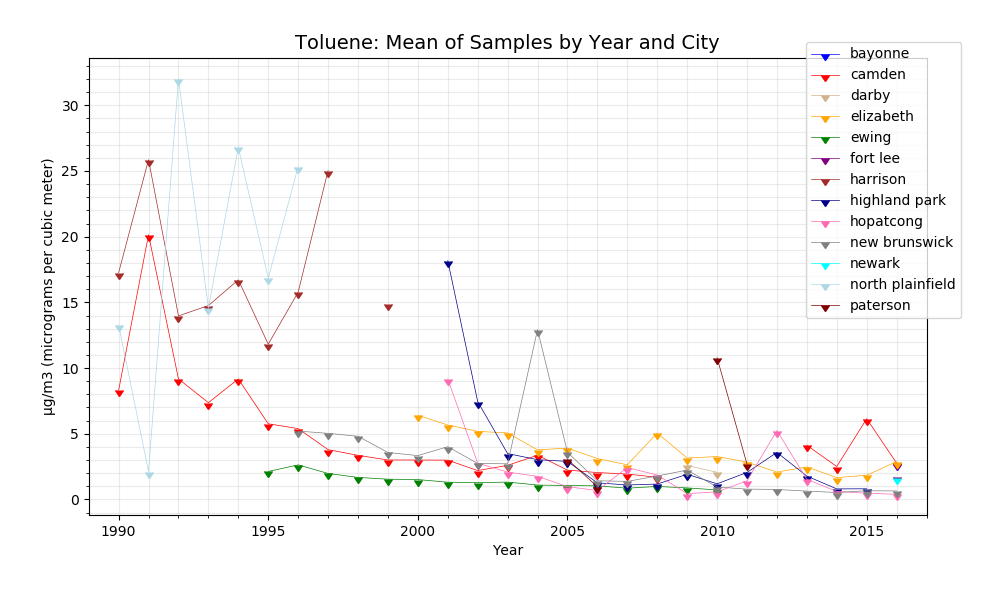

In [201]:
# A graphic look into city averages by year
# ...The drop off in the original data looks like it is due to the ending of
# ... data sampling for north plainfeild & harrison which recorded incredibly high averages

colors = ['blue', 'red', 'tan', 'orange', 'green', 'purple', 'brown', 'darkblue', 'hotpink', 'grey', 'aqua', 'lightblue', 'maroon']
clean_means.plot(sharex='all', figsize=(10,6), color=colors, marker=11, linewidth=0.5)
plt.grid(b=None, which='both', axis='both', alpha=0.25)
plt.legend(bbox_to_anchor=(1.05,1.05))
plt.ylabel('µg/m3 (micrograms per cubic meter)', size=10)
plt.xlabel('Year', size=10)
plt.xlim(1989,2017)
plt.minorticks_on()
plt.tight_layout(pad=3)
plt.title('Toluene: Mean of Samples by Year and City', size=14)
plt.savefig('Images/toluene_mean_values_per_city.png')
plt.show()

<IPython.core.display.Javascript object>


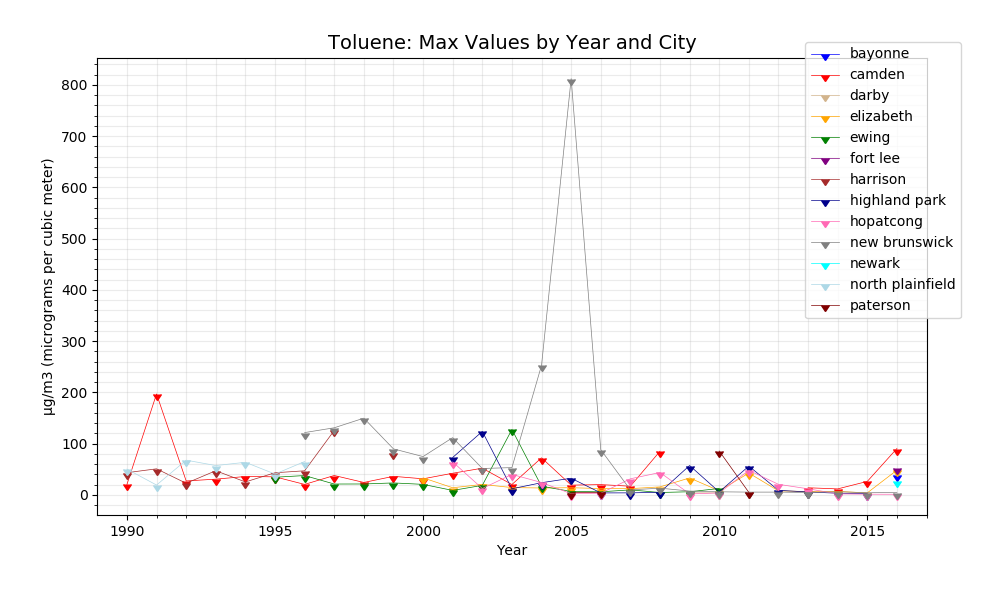

In [203]:
# A graphic look into city's max value by year

colors = ['blue', 'red', 'tan', 'orange', 'green', 'purple', 'brown', 'darkblue', 'hotpink', 'grey', 'aqua', 'lightblue', 'maroon']

clean_max.plot(sharex='all', figsize=(10,6), color=colors, marker=11, linewidth=0.5)
plt.grid(b=None, which='both', axis='both', alpha=0.25)
plt.legend(bbox_to_anchor=(1.05,1.05))
plt.ylabel('µg/m3 (micrograms per cubic meter)', size=10)
plt.xlabel('Year', size=10)
plt.xlim(1989,2017)
plt.minorticks_on()
plt.tight_layout(pad=3)
plt.title('Toluene: Max Values by Year and City', size=14)
plt.savefig('Images/toluene_max_values_per_city.png')

<IPython.core.display.Javascript object>


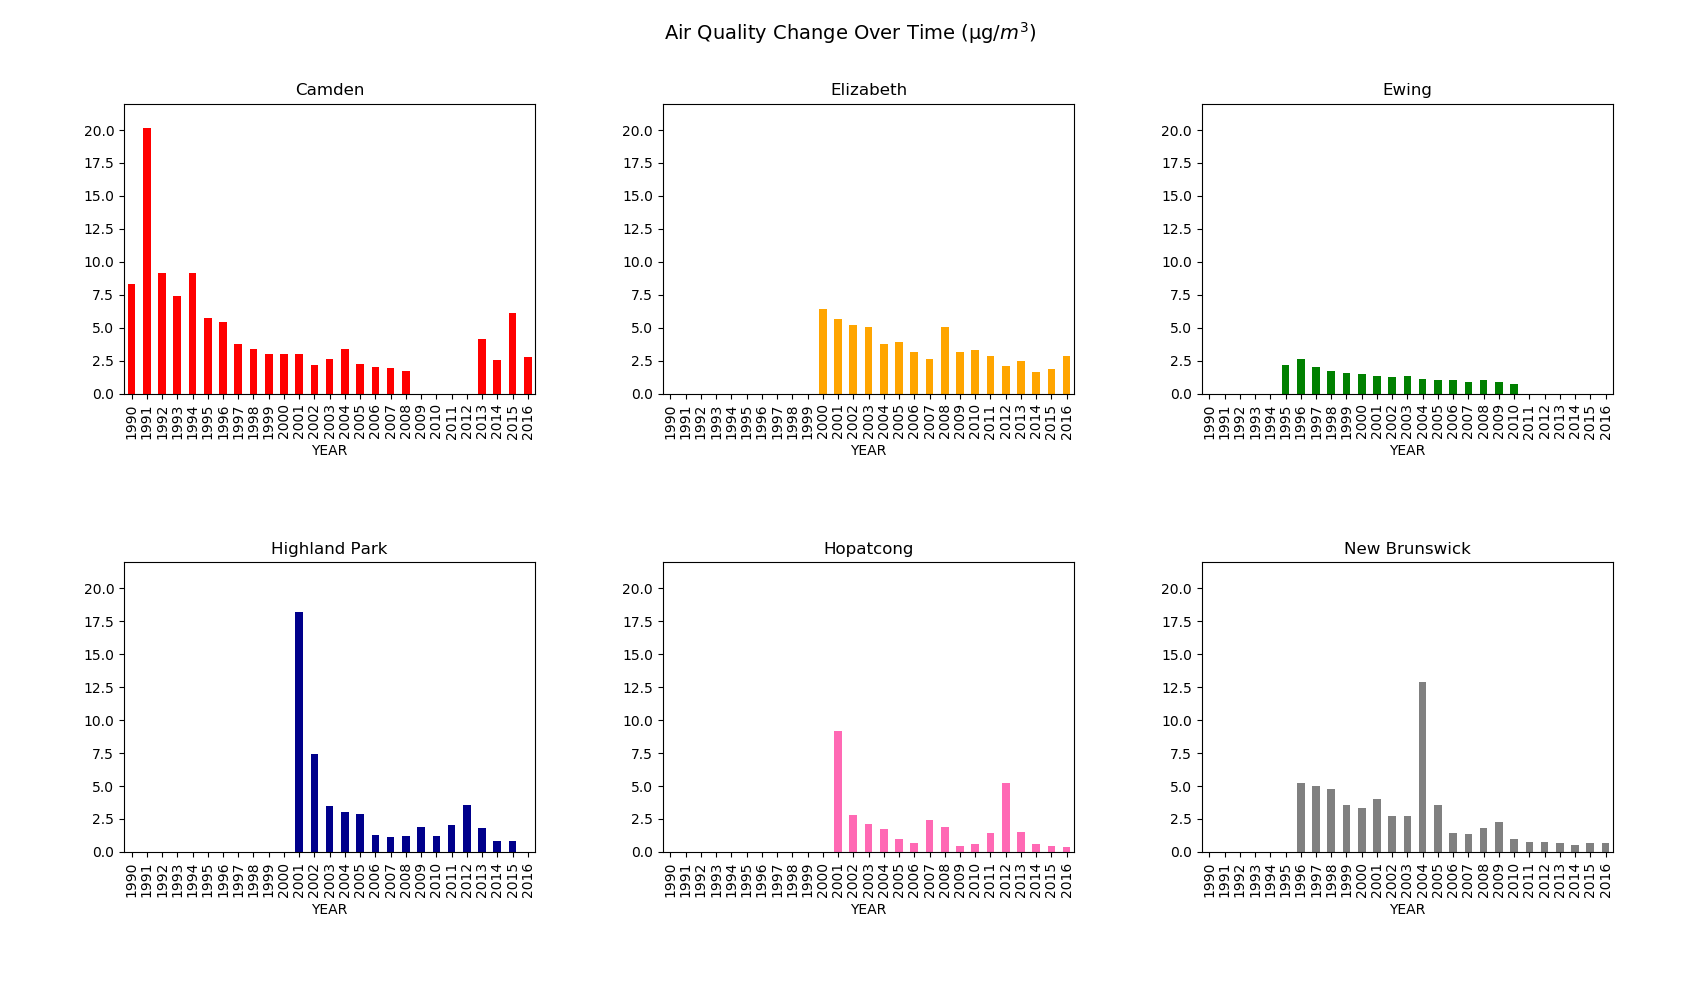

In [202]:
# Highlights of city averages: City's must have recorded at least 10 YEARS of data.

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,10))
fig.suptitle("Air Quality Change Over Time (μg/$m^3$)", size = 14, va= 'top')

clean_means['camden'].plot(kind='bar', color='red', ax=axes[0,0], ylim=(0,22), legend=False)
axes[0,0].set_title("Camden")

clean_means['elizabeth'].plot(kind='bar', color='orange', ax=axes[0,1], ylim=(0,22), legend=False)
axes[0,1].set_title("Elizabeth")

clean_means['ewing'].plot(kind='bar', color='green', ax=axes[0,2], ylim=(0,22), legend=False)
axes[0,2].set_title("Ewing")

clean_means['highland park'].plot(kind='bar', color = 'darkblue', ax=axes[1,0], ylim=(0,22), legend=False)
axes[1,0].set_title("Highland Park")

clean_means['hopatcong'].plot(kind='bar', color='hotpink', ax=axes[1,1], ylim=(0,22), legend=False)
axes[1,1].set_title("Hopatcong")

clean_means['new brunswick'].plot(kind='bar', color='grey', ax=axes[1,2], ylim=(0,22), legend=False)
axes[1,2].set_title("New Brunswick")

fig.subplots_adjust(hspace=0.45,wspace=0.1)
plt.tight_layout(pad=6)
plt.savefig('Images/toluene_mean_city_highlights.png')

<IPython.core.display.Javascript object>


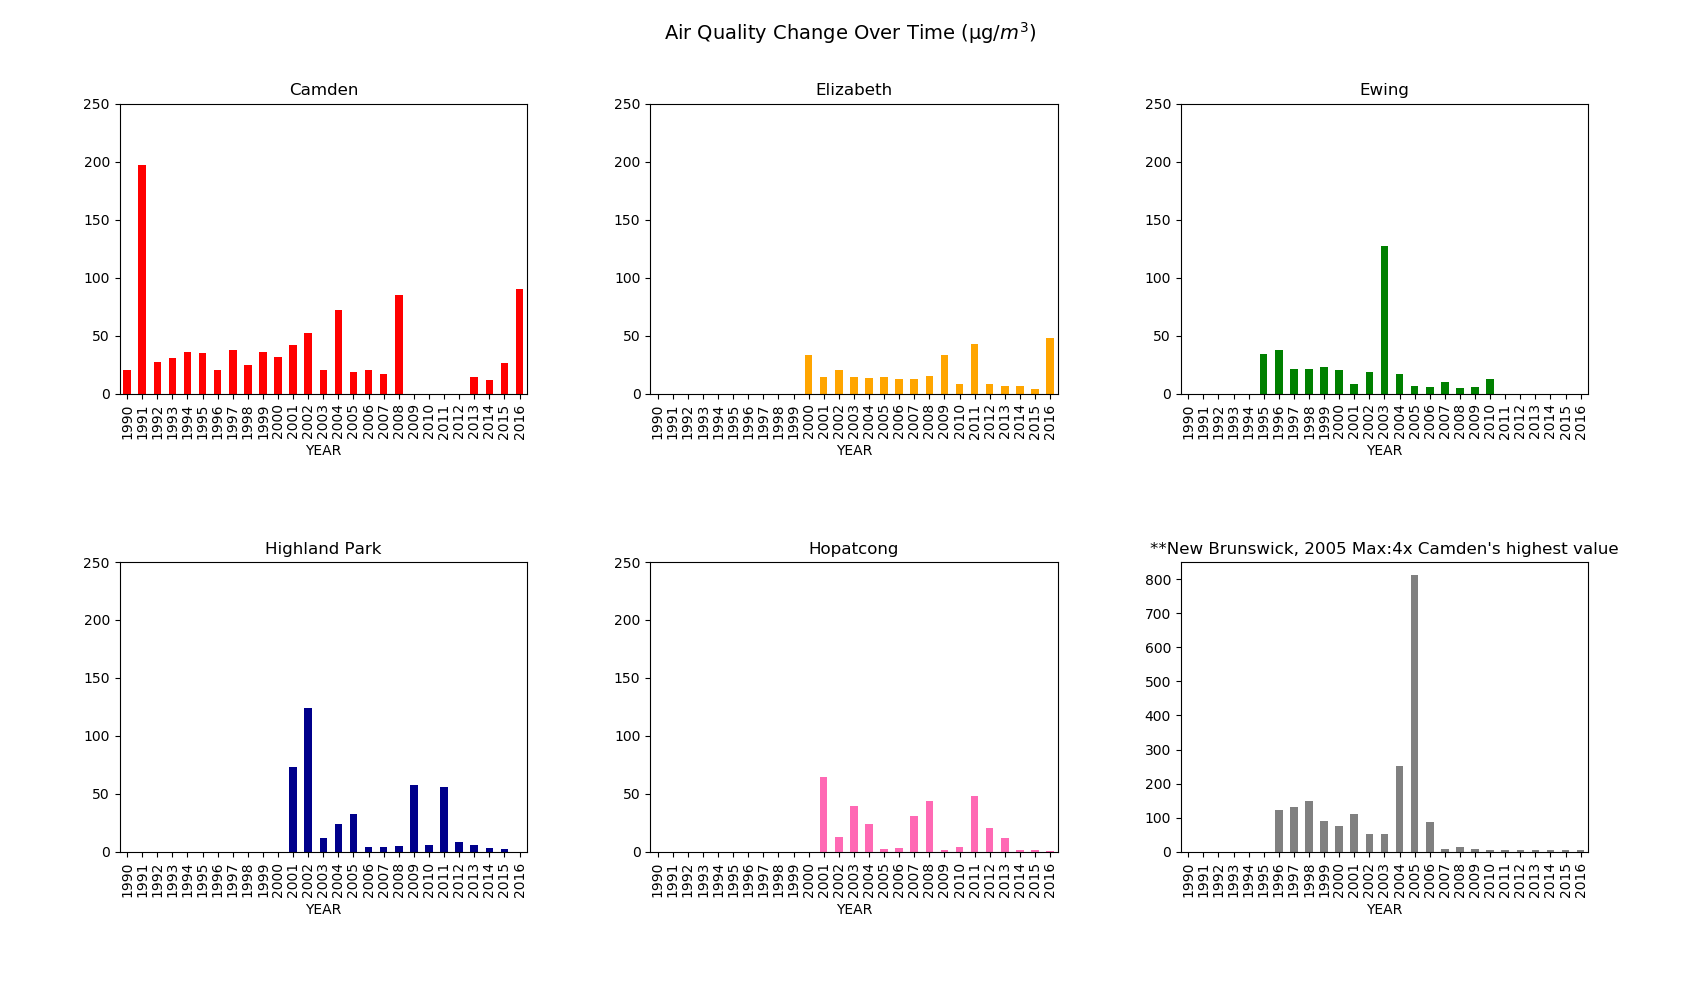

In [196]:
# Highlights of city's MAX values: City's must have recorded at least 10 YEARS of data.

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,10))
fig.suptitle("Air Quality Change Over Time (μg/$m^3$)", size = 14, va= 'top')

clean_max['camden'].plot(kind='bar', color='red', ax=axes[0,0], ylim=(0,250), legend=False)
axes[0,0].set_title("Camden")

clean_max['elizabeth'].plot(kind='bar', color='orange', ax=axes[0,1], ylim=(0,250), legend=False)
axes[0,1].set_title("Elizabeth")

clean_max['ewing'].plot(kind='bar', color='green', ax=axes[0,2], ylim=(0,250), legend=False)
axes[0,2].set_title("Ewing")

clean_max['highland park'].plot(kind='bar', color = 'darkblue', ax=axes[1,0], ylim=(0,250), legend=False)
axes[1,0].set_title("Highland Park")

clean_max['hopatcong'].plot(kind='bar', color='hotpink', ax=axes[1,1], ylim=(0,250), legend=False)
axes[1,1].set_title("Hopatcong")

clean_max['new brunswick'].plot(kind='bar', color='grey', ax=axes[1,2], ylim=(0,850), legend=False)
axes[1,2].set_title("**New Brunswick, 2005 Max:4x Camden's highest value")

fig.subplots_adjust(hspace=0.45,wspace=0.1)
plt.tight_layout(pad=6)
plt.savefig('Images/toluene_max_city_highlights.png')

<a id='Cadmium-Data'></a>

# Cadmium Data

In [80]:
# Importing the cadmium dataset
cadmium_df = pd.read_csv("Database/Cadmium/Cadmium.csv.csv")
cadmium_df.head()

,STATE_ABBR,AMA_SITE_CODE,AQS_POC,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,AQS_PARAMETER_CODE,AQS_PARAMETER_NAME,...,AQS_QUALIFIER_10,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,SAMPLE_VALUE_FLAG,BELOW_MDL_FLAG,CENSUS_TRACT_ID,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,NJ,340230006,5,PM2.5 SPECIATION NETWORK,2007,4,21-Oct-07,00:00,88110,Cadmium (PM2.5),...,NaN,811,Met One SASS Teflon,Energy dispersive XRF,NaN,Y,34023006206,1841,40.472825,-74.422403
1,NJ,340230006,5,PM2.5 SPECIATION NETWORK,2007,3,03-Sep-07,00:00,88110,Cadmium (PM2.5),...,NaN,811,Met One SASS Teflon,Energy dispersive XRF,ND,NaN,34023006206,1841,40.472825,-74.422403
2,NJ,340230006,5,PM2.5 SPECIATION NETWORK,2007,3,06-Sep-07,00:00,88110,Cadmium (PM2.5),...,NaN,811,Met One SASS Teflon,Energy dispersive XRF,ND,NaN,34023006206,1841,40.472825,-74.422403
3,NJ,340230006,5,PM2.5 SPECIATION NETWORK,2007,3,09-Sep-07,00:00,88110,Cadmium (PM2.5),...,NaN,811,Met One SASS Teflon,Energy dispersive XRF,ND,NaN,34023006206,1841,40.472825,-74.422403
4,NJ,340230006,5,PM2.5 SPECIATION NETWORK,2007,3,12-Sep-07,00:00,88110,Cadmium (PM2.5),...,NaN,811,Met One SASS Teflon,Energy dispersive XRF,ND,NaN,34023006206,1841,40.472825,-74.422403


In [81]:
# Listing which columns to keep in the dataset
cadmium_clean= cadmium_df.filter(items=['PROGRAM', 'YEAR', 'QUARTER',
       'SAMPLE_DATE', 'SAMPLE_START_TIME', 'DURATION_DESC',
       'SAMPLE_VALUE_REPORTED', 'AQS_UNIT_CODE', 'UNIT_DESC',
       'SAMPLING_FREQUENCY_CODE', 'SAMPLE_VALUE_STD_FINAL_UG_M3',
       'SAMPLE_VALUE_STD_FINAL_TYPE', 'MDL_STD_UG_M3',
       'CENSUS_TRACT_POPULATION_2010', 'MONITOR_LATITUDE', 'MONITOR_LONGITUDE'])
cadmium_clean.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,AQS_UNIT_CODE,UNIT_DESC,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,PM2.5 SPECIATION NETWORK,2007,4,21-Oct-07,00:00,24 HOURS,0.00175,105,UG/CU METER (LC),3,0.00175,L,0.010,1841,40.472825,-74.422403
1,PM2.5 SPECIATION NETWORK,2007,3,03-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.017,1841,40.472825,-74.422403
2,PM2.5 SPECIATION NETWORK,2007,3,06-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403
3,PM2.5 SPECIATION NETWORK,2007,3,09-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403
4,PM2.5 SPECIATION NETWORK,2007,3,12-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1841,40.472825,-74.422403


In [82]:
# Creating a slice of a dataset that contains a duration description of 24 Hours
cadmium_24hours= cadmium_clean[cadmium_clean['DURATION_DESC'] == '24 HOURS']
cadmium_24hours.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,AQS_UNIT_CODE,UNIT_DESC,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,PM2.5 SPECIATION NETWORK,2007,4,21-Oct-07,00:00,24 HOURS,0.00175,105,UG/CU METER (LC),3,0.00175,L,0.010,1841,40.472825,-74.422403
1,PM2.5 SPECIATION NETWORK,2007,3,03-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.017,1841,40.472825,-74.422403
2,PM2.5 SPECIATION NETWORK,2007,3,06-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403
3,PM2.5 SPECIATION NETWORK,2007,3,09-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403
4,PM2.5 SPECIATION NETWORK,2007,3,12-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1841,40.472825,-74.422403


In [83]:
# Grouping the dataset by Year
cadmium_years_24hours=cadmium_24hours.groupby(by='YEAR')
cadmium_years_24hours.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,AQS_UNIT_CODE,UNIT_DESC,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,PM2.5 SPECIATION NETWORK,2007,4,21-Oct-07,00:00,24 HOURS,0.00175,105,UG/CU METER (LC),3,0.00175,L,0.010,1841,40.472825,-74.422403
1,PM2.5 SPECIATION NETWORK,2007,3,03-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.017,1841,40.472825,-74.422403
2,PM2.5 SPECIATION NETWORK,2007,3,06-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403
3,PM2.5 SPECIATION NETWORK,2007,3,09-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403
4,PM2.5 SPECIATION NETWORK,2007,3,12-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1841,40.472825,-74.422403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,PM2.5 SPECIATION NETWORK,2014,2,16-Jun-14,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.017,1841,40.472825,-74.422403
1625,PM2.5 SPECIATION NETWORK,2013,1,01-Jan-13,00:00,24 HOURS,0.01050,105,UG/CU METER (LC),3,0.01050,L,0.010,1841,40.472825,-74.422403
1713,PM2.5 SPECIATION NETWORK,2013,2,09-Jun-13,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1841,40.472825,-74.422403
1714,PM2.5 SPECIATION NETWORK,2013,2,22-Apr-13,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403


In [84]:
# Creating a new dataframe based on the mean values of the 24 Hours table
mean_values=cadmium_years_24hours['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean()
new_df=pd.DataFrame(mean_values)
new_df=new_df.rename(columns={'SAMPLE_VALUE_STD_FINAL_UG_M3':'FINAL VALUE MEAN UG M3'})

In [85]:
# Creating a slice of a dataset based on values more than a certain number that is considered "safe"
njyears_at_risk= new_df[new_df['FINAL VALUE MEAN UG M3']>0.0018]
njyears_at_risk.head()

,FINAL VALUE MEAN UG M3
YEAR,
2002,0.002405
2003,0.002354
2004,0.002504
2005,0.002126
2009,0.002151


<IPython.core.display.Javascript object>


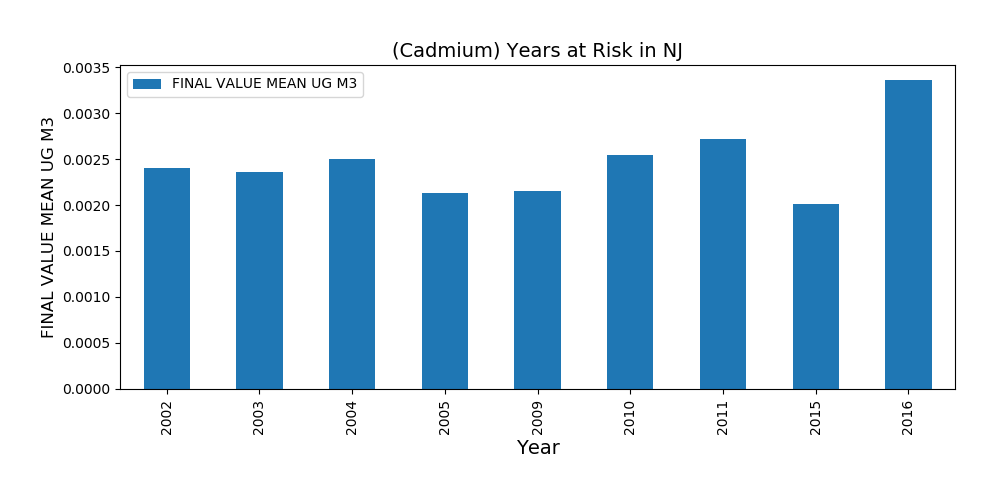

In [195]:
# Plotting the years that the mean value was more than what was considered to be "safe"
njyears_at_risk.plot(kind='bar', figsize=(10,5))
plt.title('(Cadmium) Years at Risk in NJ', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('FINAL VALUE MEAN UG M3', fontsize=12)
plt.tight_layout(pad=3)
plt.savefig('Images/cadmium_years_at_risk.png')

In [87]:
# Obtaining the unique coordinates in the dataset
coordinates = []
    
for index, row in cadmium_clean.iterrows(): 
    if (row['MONITOR_LATITUDE'], row['MONITOR_LONGITUDE']) not in coordinates:
        coordinates.append((row['MONITOR_LATITUDE'],row['MONITOR_LONGITUDE']))
coordinates

[(40.472825, -74.422403),
 (40.816809, -74.043673),
 (39.923041999999995, -75.097617),
 (39.934446, -75.125291),
 (40.833110999999995, -74.043459),
 (40.720989, -74.192892),
 (40.64144, -74.208365),
 (40.787628000000005, -74.676301),
 (40.462182, -74.429439)]

In [88]:
# Creating a loop to find the cities for those coordinates
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
# cities
city_names = []
for city in cities:
    city_names.append(city.city_name)
city_names

['highland park',
 'secaucus',
 'camden',
 'camden',
 'little ferry',
 'newark',
 'elizabeth',
 'hopatcong',
 'new brunswick']

In [89]:
# Creating a datafram that combines the coordinates and city_names lists
city_data = pd.DataFrame({'Coordinates':coordinates,'City Name': city_names})
city_data

,Coordinates,City Name
0,"(40.472825, -74.422403)",highland park
1,"(40.816809, -74.043673)",secaucus
2,"(39.923041999999995, -75.097617)",camden
3,"(39.934446, -75.125291)",camden
4,"(40.833110999999995, -74.043459)",little ferry
5,"(40.720989, -74.192892)",newark
6,"(40.64144, -74.208365)",elizabeth
7,"(40.787628000000005, -74.676301)",hopatcong
8,"(40.462182, -74.429439)",new brunswick


In [90]:
# Setting the properties for the gmap
figure_layout = {
    'width': '800px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [91]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(coordinates)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [92]:
# Creating a loop to add the city_names list into the dataset
city_index = []
for index, row in cadmium_clean.iterrows():
    for cindex, crow in city_data.iterrows():
        if crow['Coordinates'][1] == row['MONITOR_LONGITUDE']:
            city_index.append(crow['City Name'])
            continue
            
cadmium_clean['City'] = city_index            
cadmium_clean.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,AQS_UNIT_CODE,UNIT_DESC,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,City
0,PM2.5 SPECIATION NETWORK,2007,4,21-Oct-07,00:00,24 HOURS,0.00175,105,UG/CU METER (LC),3,0.00175,L,0.010,1841,40.472825,-74.422403,highland park
1,PM2.5 SPECIATION NETWORK,2007,3,03-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.017,1841,40.472825,-74.422403,highland park
2,PM2.5 SPECIATION NETWORK,2007,3,06-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403,highland park
3,PM2.5 SPECIATION NETWORK,2007,3,09-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403,highland park
4,PM2.5 SPECIATION NETWORK,2007,3,12-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1841,40.472825,-74.422403,highland park


In [93]:
# Creating a slice that contains info of values that have a duration description of 24 Hours
cadmium_24hours= cadmium_clean[cadmium_clean['DURATION_DESC'] == '24 HOURS']
cadmium_24hours.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,AQS_UNIT_CODE,UNIT_DESC,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,City
0,PM2.5 SPECIATION NETWORK,2007,4,21-Oct-07,00:00,24 HOURS,0.00175,105,UG/CU METER (LC),3,0.00175,L,0.010,1841,40.472825,-74.422403,highland park
1,PM2.5 SPECIATION NETWORK,2007,3,03-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.017,1841,40.472825,-74.422403,highland park
2,PM2.5 SPECIATION NETWORK,2007,3,06-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403,highland park
3,PM2.5 SPECIATION NETWORK,2007,3,09-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403,highland park
4,PM2.5 SPECIATION NETWORK,2007,3,12-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1841,40.472825,-74.422403,highland park


In [94]:
# Dropping all the NaN values from the dataset
cadmium_24hours=cadmium_24hours.dropna()
cadmium_24hours

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,AQS_UNIT_CODE,UNIT_DESC,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,City
0,PM2.5 SPECIATION NETWORK,2007,4,21-Oct-07,00:00,24 HOURS,0.00175,105,UG/CU METER (LC),3,0.00175,L,0.010,1841,40.472825,-74.422403,highland park
1,PM2.5 SPECIATION NETWORK,2007,3,03-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.017,1841,40.472825,-74.422403,highland park
2,PM2.5 SPECIATION NETWORK,2007,3,06-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403,highland park
3,PM2.5 SPECIATION NETWORK,2007,3,09-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403,highland park
4,PM2.5 SPECIATION NETWORK,2007,3,12-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1841,40.472825,-74.422403,highland park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7307,PM2.5 SPECIATION NETWORK,2007,4,14-Nov-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1649,40.787628,-74.676301,hopatcong
7308,PM2.5 SPECIATION NETWORK,2007,4,17-Nov-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.017,1649,40.787628,-74.676301,hopatcong
7309,PM2.5 SPECIATION NETWORK,2007,4,20-Nov-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1649,40.787628,-74.676301,hopatcong
7310,PM2.5 SPECIATION NETWORK,2007,4,26-Nov-07,00:00,24 HOURS,0.00024,105,UG/CU METER (LC),3,0.00024,L,0.010,1649,40.787628,-74.676301,hopatcong


In [95]:
# Grouping the values by City and Year
city_group = cadmium_24hours.groupby(by=['YEAR','City'])
city_group.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,AQS_UNIT_CODE,UNIT_DESC,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,City
0,PM2.5 SPECIATION NETWORK,2007,4,21-Oct-07,00:00,24 HOURS,0.00175,105,UG/CU METER (LC),3,0.00175,L,0.010,1841,40.472825,-74.422403,highland park
1,PM2.5 SPECIATION NETWORK,2007,3,03-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.017,1841,40.472825,-74.422403,highland park
2,PM2.5 SPECIATION NETWORK,2007,3,06-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403,highland park
3,PM2.5 SPECIATION NETWORK,2007,3,09-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403,highland park
4,PM2.5 SPECIATION NETWORK,2007,3,12-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1841,40.472825,-74.422403,highland park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,PM2.5 SPECIATION NETWORK,2008,3,19-Aug-08,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1649,40.787628,-74.676301,hopatcong
7084,PM2.5 SPECIATION NETWORK,2008,3,05-Jul-08,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1649,40.787628,-74.676301,hopatcong
7085,PM2.5 SPECIATION NETWORK,2008,3,08-Jul-08,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1649,40.787628,-74.676301,hopatcong
7086,PM2.5 SPECIATION NETWORK,2008,3,14-Jul-08,00:00,24 HOURS,0.00467,105,UG/CU METER (LC),3,0.00467,L,0.010,1649,40.787628,-74.676301,hopatcong


In [96]:
# Creating a dataframe based on the mean values of the city and year group
city_df = pd.DataFrame(city_group['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean())
city_df

SAMPLE_VALUE_STD_FINAL_UG_M3
YEAR City                                       
2001 camden                             0.002403
     elizabeth                          0.001725
     highland park                      0.001341
     hopatcong                          0.002016
2002 camden                             0.002494
...                                          ...
2016 elizabeth                          0.003252
     highland park                      0.004366
     hopatcong                          0.003459
     new brunswick                      0.002672
     newark                             0.003538

[69 rows x 1 columns]

In [97]:
#Get cities with Risk of getting cancer by Cadmium EPA at Risk levels by mean levels of the data duing the time evaluated
cadmiumcities_at_risk= city_df[city_df['SAMPLE_VALUE_STD_FINAL_UG_M3'] > 0.0018]
cadmiumcities_at_risk=cadmiumcities_at_risk.rename(columns={'SAMPLE_VALUE_STD_FINAL_UG_M3':'FINAL VALUE MEAN UG M3'})
cadmiumcities_at_risk.head()

FINAL VALUE MEAN UG M3
YEAR City                             
2001 camden                   0.002403
     hopatcong                0.002016
2002 camden                   0.002494
     elizabeth                0.002805
     hopatcong                0.003017

<IPython.core.display.Javascript object>


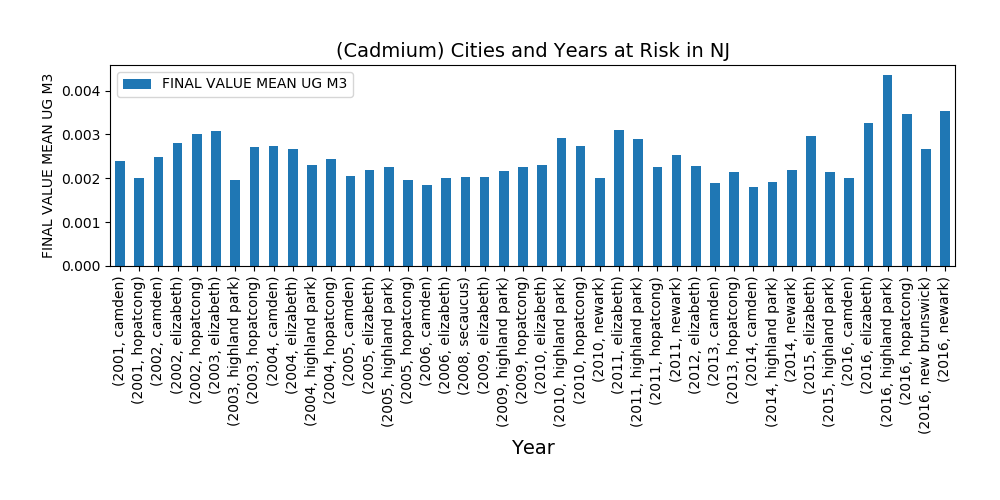

In [192]:
# Plotting the mean values for the city and year
cadmiumcities_at_risk.plot(kind='bar', figsize=(10,5))
plt.title('(Cadmium) Cities and Years at Risk in NJ', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('FINAL VALUE MEAN UG M3', fontsize=10)
plt.tight_layout(pad=3)
plt.savefig('Images/cadmium_cities_years_at_risk.png')

In [99]:
# Resetting the index to be a multi-level index
city_df_pivot=city_df.reset_index().pivot('YEAR','City','SAMPLE_VALUE_STD_FINAL_UG_M3')
city_df_pivot=city_df_pivot.fillna(0)

city_df_pivot

City,camden,elizabeth,highland park,hopatcong,new brunswick,newark,secaucus
YEAR,,,,,,,
2001,0.002403,0.001725,0.001341,0.002016,0.000000,0.000000,0.000000
2002,0.002494,0.002805,0.001767,0.003017,0.000000,0.000000,0.000000
2003,0.001763,0.003077,0.001957,0.002705,0.000000,0.000000,0.000000
2004,0.002728,0.002668,0.002300,0.002433,0.000000,0.000000,0.000000
2005,0.002041,0.002181,0.002248,0.001966,0.000000,0.000000,0.000000
2006,0.001851,0.002006,0.001617,0.001591,0.000000,0.000000,0.000000
2007,0.000321,0.000425,0.000629,0.000874,0.000000,0.000000,0.000000
2008,0.000743,0.001681,0.000878,0.001058,0.000000,0.000000,0.002031
2009,0.000000,0.002028,0.002165,0.002253,0.000000,0.000000,0.000000


In [100]:
# Separating the cities into their own slices
city_df_elizabeth=city_df_pivot['elizabeth']
city_df_camden=city_df_pivot['camden']
city_df_highland_park=city_df_pivot['highland park']
city_df_hopatcong=city_df_pivot['hopatcong']

<IPython.core.display.Javascript object>


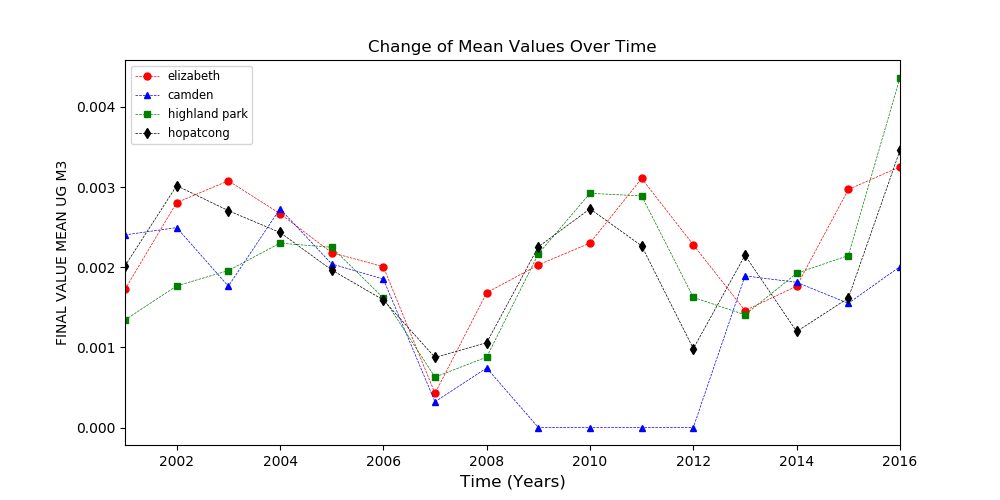

In [182]:
# Plotting the cities mean values over time
fig=plt.figure(figsize=(10,5))
city_df_elizabeth.plot(x='YEAR', y='elizabeth', color="r", marker='o', markersize=5, linestyle="dashed", linewidth=0.50, label='elizabeth')
city_df_camden.plot(x='YEAR', y='camden', color="b", marker='^', markersize=5, linestyle="dashed", linewidth=0.50, label='camden')
city_df_highland_park.plot(x='YEAR', y='highland park', color="g", marker='s', markersize=5, linestyle="dashed", linewidth=0.50, label='highland park')
city_df_hopatcong.plot(x='YEAR', y='hopatcong', color="k", marker='d', markersize=5, linestyle="dashed", linewidth=0.50, label='hopatcong')
plt.title('Change of Mean Values Over Time',fontsize=12)
plt.xlabel('Time (Years)',fontsize=12)
plt.ylabel('FINAL VALUE MEAN UG M3',fontsize=10)
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.savefig('Images/cadmium_yearly_city_mean.png')
plt.show()

In [102]:
#Out of the City with Highest Risk Show change of Mean over the time evaluated
city_at_higher_risk=cadmium_24hours[cadmium_24hours['City'] == 'highland park']
city_at_higher_risk_year=city_at_higher_risk.groupby(by='YEAR')
city_at_higher_risk_df = pd.DataFrame(city_at_higher_risk_year['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean())
city_at_higher_risk_df=city_at_higher_risk_df.rename(columns={'SAMPLE_VALUE_STD_FINAL_UG_M3':'FINAL VALUE MEAN UG M3'})
city_at_higher_risk_df
# city_at_higher_risk

,FINAL VALUE MEAN UG M3
YEAR,
2001,0.001341
2002,0.001767
2003,0.001957
2004,0.002300
2005,0.002248
2006,0.001617
2007,0.000629
2008,0.000878
2009,0.002165


In [184]:
# Creating a list of the years
year_list = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
            '2012', '2013', '2014', '2015', '2016']

In [185]:
# Creating an array of the mean values for the cities at higher risk
Final_value_mean=city_at_higher_risk_df['FINAL VALUE MEAN UG M3'].values
Final_value_mean

array([0.00134137, 0.00176671, 0.00195727, 0.00229973, 0.00224786,
       0.00161702, 0.0006287 , 0.00087795, 0.00216494, 0.00292157,
       0.00288884, 0.00162296, 0.00140616, 0.00192406, 0.00214506,
       0.00436608])

<IPython.core.display.Javascript object>


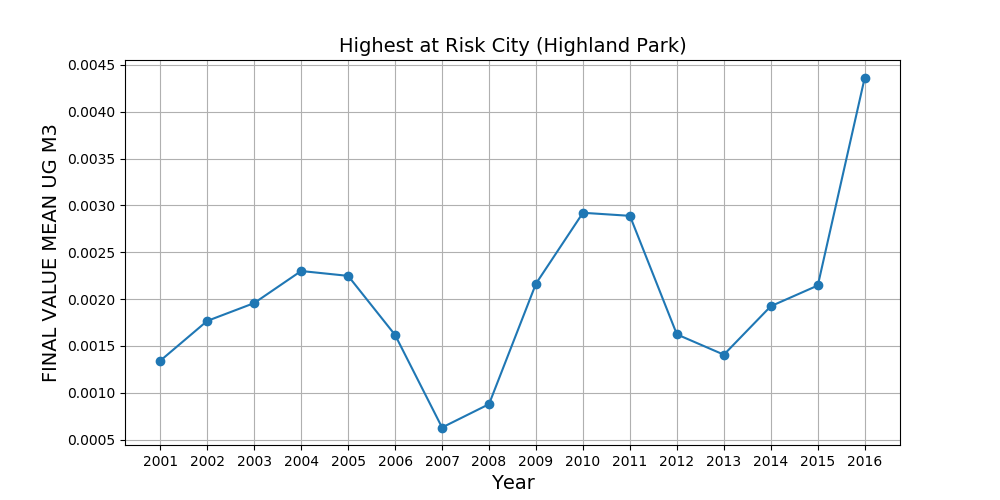

In [190]:
#Show change of mean Value of City with highest risk level over the time evaluated
plt.figure(figsize=(10,5))
plt.plot(year_list, Final_value_mean, marker='o')
plt.title('Highest at Risk City (Highland Park)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('FINAL VALUE MEAN UG M3', fontsize=14)
plt.grid(True)
plt.savefig('Images/cadmium_highest_at_risk_city.png')
plt.show()

<a id=Combo-Plots></a>

# Combo Plots

In [187]:
# Creating the groupby statements for each dataset

chromium_mean_year = chromium_df.groupby(by='YEAR')
chromium_year_mean = pd.DataFrame(chromium_mean_year['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean())
# chromium_year_mean

benzene_year_mean = pd.DataFrame(year_group['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean())
year_group['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean()
# benzene_year_mean

toluene_year_mean = year_group_db
# toluene_year_mean

cadmium_year_group = cadmium_clean.groupby(by='YEAR')
cadmium_year_mean = pd.DataFrame(cadmium_year_group['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean())
# cadmium_year_mean

#------------------------------------------------------------------------------------------------
# Merging the separate dataset groups into one master table

master_mean_table = pd.merge(chromium_year_mean, benzene_year_mean, on='YEAR', how='outer', suffixes=("_Chromium", "_Benzene"))
# master_mean_table

master_mean_table =  pd.merge(master_mean_table, toluene_year_mean, on='YEAR', how='outer', suffixes=("_Benzene","_Toluene"))
# master_mean_table

master_mean_table =  pd.merge(master_mean_table, cadmium_year_mean, on='YEAR', how='outer', suffixes=("_Toluene", "_Cadmium"))
# master_mean_table

master_mean_table = master_mean_table.sort_index()
master_mean_table.head()

,SAMPLE_VALUE_STD_FINAL_UG_M3_Chromium,SAMPLE_VALUE_STD_FINAL_UG_M3_Benzene,SAMPLE_VALUE_STD_FINAL_UG_M3_Toluene,SAMPLE_VALUE_STD_FINAL_UG_M3_Cadmium
YEAR,,,,
1990,NaN,3.847527,10.865009,NaN
1991,0.000037,3.245165,17.910314,NaN
1992,0.000066,4.663434,17.469820,NaN
1993,0.000209,3.420350,12.581520,NaN
1994,0.000462,4.043942,13.681692,NaN


In [188]:
# Renaming the columns for more readability

master_mean_table = master_mean_table.rename(columns={'SAMPLE_VALUE_STD_FINAL_UG_M3_Chromium':'Chromium',
                                                      'SAMPLE_VALUE_STD_FINAL_UG_M3_Benzene':'Benzene',
                                                      'SAMPLE_VALUE_STD_FINAL_UG_M3_Toluene':'Toluene',
                                                      'SAMPLE_VALUE_STD_FINAL_UG_M3_Cadmium':'Cadmium'})
master_mean_table.head()

,Chromium,Benzene,Toluene,Cadmium
YEAR,,,,
1990,NaN,3.847527,10.865009,NaN
1991,0.000037,3.245165,17.910314,NaN
1992,0.000066,4.663434,17.469820,NaN
1993,0.000209,3.420350,12.581520,NaN
1994,0.000462,4.043942,13.681692,NaN


<IPython.core.display.Javascript object>


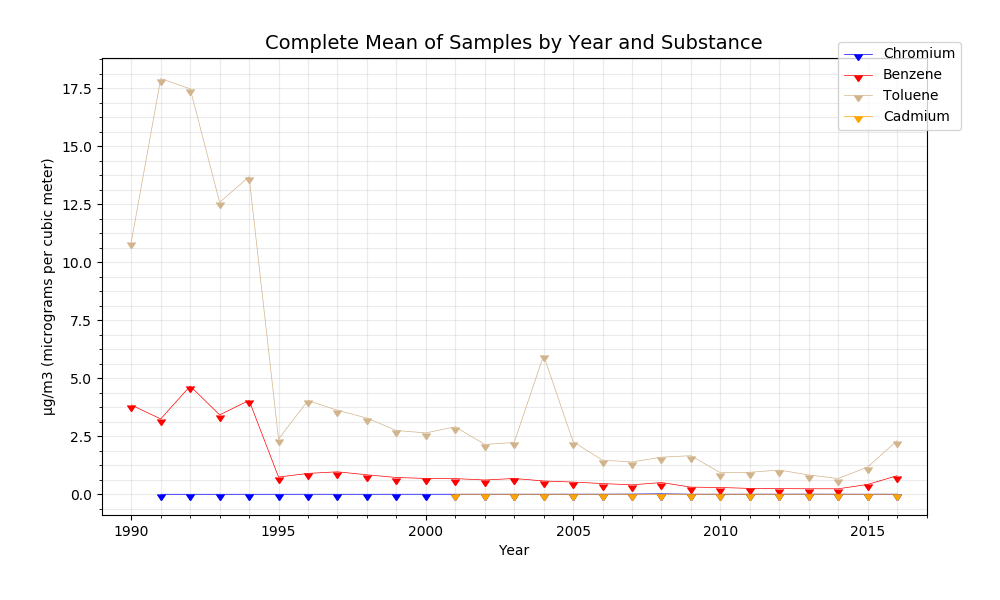

In [189]:
# Plotting the mean values for each city by Year for each Toxin into a line chart
colors = ['blue', 'red', 'tan', 'orange']
master_mean_table.plot(sharex='all', figsize=(10,6), color=colors, marker=11, linewidth=0.5)
plt.grid(b=None, which='both', axis='both', alpha=0.25)
plt.legend(bbox_to_anchor=(1.05,1.05))
plt.ylabel('µg/m3 (micrograms per cubic meter)', size=10)
plt.xlabel('Year', size=10)
plt.xlim(1989,2017)
plt.minorticks_on()
plt.tight_layout(pad=3)
plt.title('Complete Mean of Samples by Year and Substance', size=14)
plt.savefig('Images/all_mean_values_per_year.png')
plt.show()